# Heatmaps: Sensitivity/Precision

Representation with heatmaps plots of the different levels of sensitivy and precisions, in which variables like CCFs, tumour purity, number or supporting of reads are used to perform the classification of the different spectra of the obtained results.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 


In [237]:
df = pd.pivot_table(data=sns.load_dataset("flights"),
                    index='month',
                    values='passengers',
                    columns='year')
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


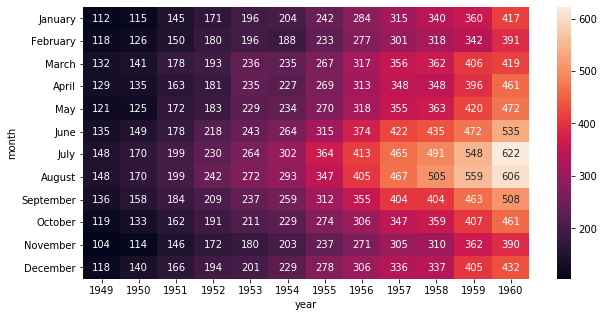

In [238]:
sns.heatmap(df,annot=True,fmt="d")
#sns.heatmap(df,annot=True,cmap='coolwarm',fmt="d")

## - VENN DIAGRAMs:

In [386]:
import matplotlib_venn as venn

In [387]:
from matplotlib_venn import venn2, venn2_circles

In [388]:
from matplotlib import pyplot as plt

# ARMs: CNVs

In [4]:
##Files
#/work/isabl/home/gutierj2/uk_all/notebooks/clinic/1-HEATMAP_I_example_TINder_MERGE_SUPER.tsv
#/work/isabl/home/gutierj2/uk_all/notebooks/clinic/2-HEATMAP_I_example_TRIPLE_MERGE_SUPER.tsv

## 1) TRIPLE:

In [758]:
heat_triple=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/1-HEATMAP_I_example_TRIPLE_MERGE_ARMs_SUPER.tsv',sep='\t')
heat_triple.head()

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
0,0,13.0,13.0,25760508.0,114998761.0,3.0,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,89238253.0
1,1,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_5874537_170921794_IID_H158613_T01_01_WG01,6p_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0
2,2,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_5874537_170921794_IID_H158613_T01_01_WG01,6q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0
3,3,7.0,7.0,61058365.0,159122682.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7q,61054331.0,159138663.0,7_7q,7_61058365_159122682_IID_H158666_T01_01_WG01,7q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,98064317.0
4,4,5.0,5.0,850203.0,46387657.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,5p,0.0,46405641.0,5_5p,5_850203_46387657_IID_H158666_T01_01_WG01,5p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,45537454.0


In [759]:
print(heat_triple.shape)
heat_triple_cnvs=heat_triple[~(heat_triple['CNV_x'].isnull())]

(185, 31)


In [359]:
heat_triple_cnvs_nodups=heat_triple_cnvs.drop_duplicates(subset='keys_arms')
heat_triple_cnvs_nodups.shape

(179, 31)

- Purity:

In [360]:
BTG_directories_doc='/home/gutierj2/uk_all/321project_BATTENBERG_directories.list'
BTG_directories=!cat {BTG_directories_doc}

sample_list=[]
purity_list=[]

for n in BTG_directories:
    route=n+'/*_rho_and_psi.txt'
    path=!ls {route}
    
    sample=path[0].split('/')[8].split('_rho')[0]
    
    purity_file=pd.read_csv(path[0],sep='\t')
    for index,row in purity_file.iterrows():
        if(index=='FRAC_GENOME'):
            sample_list.append(sample)
            purity_list.append(row['rho'])
 
table_purity=pd.DataFrame()
table_purity['Sample']=sample_list
table_purity['Sample_x']=sample_list
table_purity['Purity']=purity_list
table_purity=table_purity[['Sample_x','Purity']]

In [361]:
table_purity.sort_values(by=['Sample_x'])

,Sample_x,Purity
0,IID_H158604_T01_01_WG01,0.910000
3,IID_H158605_T01_01_WG01,0.780000
2,IID_H158606_T01_01_WG01,0.850000
1,IID_H158607_T01_01_WG01,0.800000
4,IID_H158608_T01_01_WG01,0.921840
5,IID_H158609_T01_01_WG01,0.504500
7,IID_H158610_T01_01_WG01,0.893000
8,IID_H158611_T01_01_WG01,0.953000
14,IID_H158612_T01_01_WG01,0.344400
15,IID_H158613_T01_01_WG01,0.848320


In [362]:
heat_triple_cnvs_nodups_PURITY=pd.merge(heat_triple_cnvs_nodups,table_purity,on='Sample_x')
print(heat_triple_cnvs_nodups_PURITY.shape)
heat_triple_cnvs_nodups_PURITY.head()

(179, 32)


,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z,Purity
0,0,13.0,13.0,25760508.0,114998761.0,3.0,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,89238253.0,0.218522
1,1,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_5874537_170921794_IID_H158613_T01_01_WG01,6p_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0,0.848320
2,2,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_5874537_170921794_IID_H158613_T01_01_WG01,6q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0,0.848320
3,33,1.0,1.0,111991845.0,249191132.0,4.0,1.000000,IID_H158613_T01_01_WG01,Detected,1q,124535434.0,249250621.0,1_1q,1_111991845_249191132_IID_H158613_T01_01_WG01,1q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,137199287.0,0.848320
4,34,2.0,2.0,37259.0,85916487.0,2.0,1.000000,IID_H158613_T01_01_WG01,Detected,2p,0.0,92326171.0,2_2p,2_37259_85916487_IID_H158613_T01_01_WG01,2p_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,85879228.0,0.848320


- Patient: IID_H158666_T01_01_WG01

In [363]:
heat_triple_cnvs_nodups_PURITY[heat_triple_cnvs_nodups_PURITY['Sample_x']=='IID_H158666_T01_01_WG01']

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z,Purity
33,3,7.0,7.0,61058365.0,159122682.0,3.0,1.0,IID_H158666_T01_01_WG01,Non Detected,7q,61054331.0,159138663.0,7_7q,7_61058365_159122682_IID_H158666_T01_01_WG01,7q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,98064317.0,0.93312
34,4,5.0,5.0,850203.0,46387657.0,3.0,1.0,IID_H158666_T01_01_WG01,Non Detected,5p,0.0,46405641.0,5_5p,5_850203_46387657_IID_H158666_T01_01_WG01,5p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,45537454.0,0.93312
35,5,4.0,4.0,69567.0,190790246.0,3.0,1.0,IID_H158666_T01_01_WG01,Non Detected,4p,0.0,49660117.0,4_4p,4_69567_190790246_IID_H158666_T01_01_WG01,4p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,190720679.0,0.93312
36,6,4.0,4.0,69567.0,190790246.0,3.0,1.0,IID_H158666_T01_01_WG01,Non Detected,4q,52660117.0,191154276.0,4_4q,4_69567_190790246_IID_H158666_T01_01_WG01,4q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,190720679.0,0.93312
37,7,7.0,7.0,82180.0,58047888.0,2.0,1.0,IID_H158666_T01_01_WG01,Non Detected,7p,0.0,58054331.0,7_7p,7_82180_58047888_IID_H158666_T01_01_WG01,7p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,57965708.0,0.93312
38,8,1.0,1.0,120463044.0,249196349.0,3.0,1.0,IID_H158666_T01_01_WG01,Non Detected,1q,124535434.0,249250621.0,1_1q,1_120463044_249196349_IID_H158666_T01_01_WG01,1q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,128733305.0,0.93312


In [364]:
heat_triple_cnvs_nodups_PURITY_no66=heat_triple_cnvs_nodups_PURITY[~(heat_triple_cnvs_nodups_PURITY['Sample_x']=='IID_H158666_T01_01_WG01')]

In [365]:
##COLS:

#heat_triple_cnvs_PURITY['Purity_y']
#heat_triple_cnvs_PURITY['Event_Cells']
#heat_triple_cnvs_PURITY['Detection_z']

- INTERVALS:

In [366]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
heat_triple_cnvs_nodups_PURITY_groups=heat_triple_cnvs_nodups_PURITY_no66.copy()

heat_triple_cnvs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_triple_cnvs_nodups_PURITY_groups['Purity'], ranges)
heat_triple_cnvs_nodups_PURITY_groups["range_cells"] = pd.cut(heat_triple_cnvs_nodups_PURITY_groups['Cells'], ranges)

In [37]:
heat_triple_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

range_purity  range_cells  Detection_z 
(0.0, 0.1]    (0.0, 0.1]   Detected         0
                           Non Detected     0
              (0.1, 0.2]   Detected         0
                           Non Detected     0
              (0.2, 0.3]   Detected         0
                           Non Detected     0
              (0.3, 0.4]   Detected         0
                           Non Detected     0
              (0.4, 0.5]   Detected         0
                           Non Detected     0
              (0.5, 0.6]   Detected         0
                           Non Detected     0
              (0.6, 0.7]   Detected         0
                           Non Detected     0
              (0.7, 0.8]   Detected         0
                           Non Detected     0
              (0.8, 0.9]   Detected         0
                           Non Detected     0
              (0.9, 1.0]   Detected         0
                           Non Detected     0
(0.1, 0.2]    (0.0, 0.1]   Detected     

In [40]:
matrix_triple=heat_triple_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

sensitivities=[]
for n in range(0,199,2):
    total=matrix_triple[[n]][0]+matrix_triple[[n+1]][0]
    sensitivity=matrix_triple[[n]][0]/total
    sensitivities.append(sensitivity)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [41]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = pd.DataFrame(np.array(sensitivities).reshape(10,10),index=ranges2, columns=ranges2)

In [43]:
np.array(sensitivities).reshape(10,10)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  0.],
       [nan, nan, nan, nan,  1., nan,  1., nan, nan,  1.],
       [nan, nan,  1., nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan,  1., nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [ 1., nan, nan,  0., nan, nan, nan,  1.,  1.,  1.],
       [ 1.,  1.,  1., nan,  1.,  1., nan, nan,  1.,  1.]])

In [44]:
df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
0.4,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0
0.5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,1.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0
1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [45]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
0.9,1.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,1.0
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
0.5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.4,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0.1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
0.6,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
0.8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0,NaN


In [47]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
0.7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
0.5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
0.3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


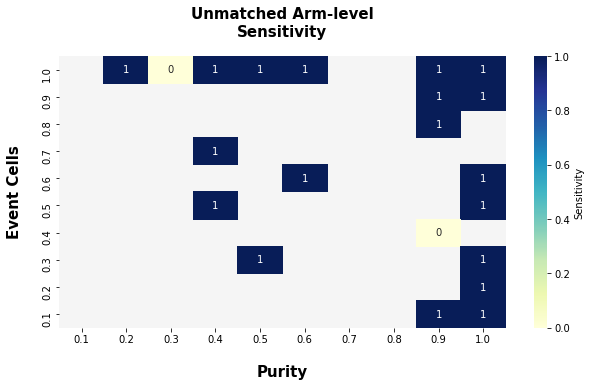

In [48]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
plt.title('Unmatched Arm-level\nSensitivity',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

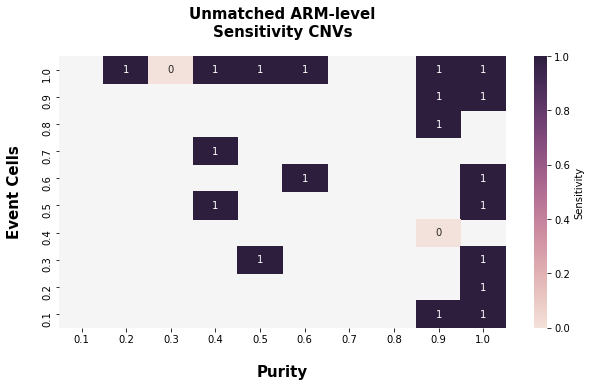

In [49]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched ARM-level\nSensitivity CNVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

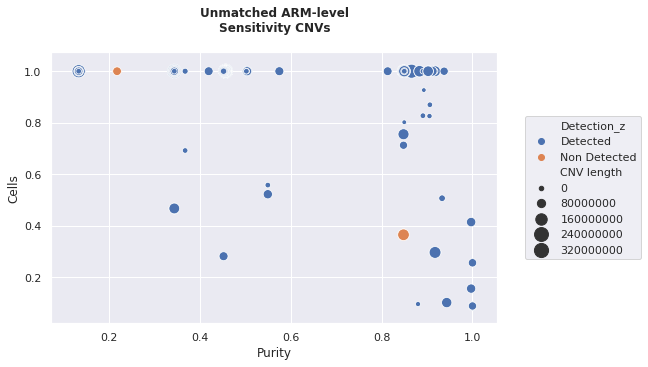

In [51]:
sns.set(rc={'figure.figsize':(8,5)})
heat_triple_cnvs_nodups_PURITY_groups['CNV length']=heat_triple_cnvs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity", y="Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],size='CNV length',sizes=(20, 200),alpha=1, data=heat_triple_cnvs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.title('Unmatched ARM-level\nSensitivity CNVs',weight='bold')
plt.show()    

- SUMMARY:

In [368]:
heat_triple_cnvs_nodups_PURITY_groups.columns

Index(['Unnamed: 0', 'index_x', 'chr_seg_x', 'start_seg_x', 'end_seg_x',
       'CNV_x', 'Cells', 'Sample_x', 'Detection_x', 'chr_arm_x', 'start_arm_x',
       'end_arm_x', 'name_arm_x', 'keys_x', 'keys_arms', 'index_y',
       'chr_seg_y', 'start_seg_y', 'end_seg_y', 'CNV_y', 'brass_PS',
       'brass_RC', 'Sample_y', 'Detection_y', 'chr_arm_y', 'start_arm_y',
       'end_arm_y', 'name_arm_y', 'keys_y', 'Detection_z', 'Size_z', 'Purity',
       'range_purity', 'range_cells'],
      dtype='object')

In [376]:
slide=heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'][['chr_seg_x', 'start_seg_x', 'end_seg_x','CNV_x', 'Cells', 'Sample_x','chr_arm_x', 'start_arm_x','end_arm_x','Detection_z', 'Size_z', 'Purity']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','chr_arm', 'start_arm','end_arm','Detection', 'Size', 'Purity']
slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['start_arm']=slide['start_arm'].map(int)
slide['end_arm']=slide['end_arm'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,chr_arm,start_arm,end_arm,Detection,Size,Purity
0,1,6,5874537,170921794,3.0,0.363969,IID_H158613_T01_01_WG01,6p,0,58830166,Non Detected,165047257,0.848320
1,2,6,5874537,170921794,3.0,0.363969,IID_H158613_T01_01_WG01,6q,61830166,171115067,Non Detected,165047257,0.848320
2,0,13,25760508,114998761,3.0,1.000000,IID_H158669_T01_01_WG01,13q,19000000,115169878,Non Detected,89238253,0.218522


In [406]:
print(heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Detected'].shape)
print(heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'].shape)

(170, 34)
(3, 34)


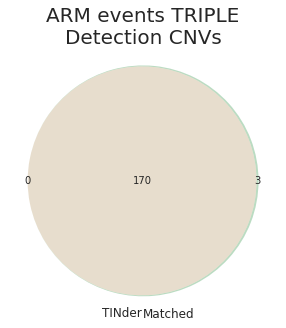

In [547]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,3,170), set_labels = ('TINder', 'Matched'))
plt.title('ARM events TRIPLE\nDetection CNVs',fontsize=20,pad=1)
plt.show()

## 2) TINder:

In [377]:
heat_tinder=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/1-HEATMAP_I_example_TINder_MERGE_ARMs_SUPER.tsv',sep='\t')
heat_tinder.head()

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
0,0,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0
1,1,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_210000_170910001_IID_H158612_T01_01_WG01,6q_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0
2,2,13.0,13.0,28866212.0,115109878.0,1.0,0.81,IID_H158613_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_28866212_115109878_IID_H158613_T01_01_WG01,13q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,86243666.0
3,3,9.0,9.0,195000.0,38774194.0,1.0,0.91,IID_H158637_T01_01_WG01,Non Detected,9p,0.0,47367679.0,9_9p,9_195000_38774194_IID_H158637_T01_01_WG01,9p_IID_H158637_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,38579194.0
4,4,20.0,20.0,60000.0,26159211.0,3.0,0.91,IID_H158637_T01_01_WG01,Non Detected,20p,0.0,26369569.0,20_20p,20_60000_26159211_IID_H158637_T01_01_WG01,20p_IID_H158637_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,26099211.0


In [378]:
print(heat_tinder.shape)
heat_tinder_cnvs=heat_tinder[~(heat_tinder['Cells'].isnull())]

(169, 31)


In [379]:
heat_tinder_cnvs_nodups=heat_tinder_cnvs.drop_duplicates(subset='keys_arms')
heat_tinder_cnvs_nodups.shape

(158, 31)

- Purity:

In [380]:
tinder_purity=pd.read_csv('/work/isabl/home/gutierj2/uk_all/purity/tinder_purity.tsv',sep='\t')
tinder_purity.columns=['Sample_x','Purity']
tinder_purity.head(1)

,Sample_x,Purity
0,IID_H158604_T01_01_WG01,1.0


In [381]:
heat_tinder_cnvs_nodups_PURITY=pd.merge(heat_tinder_cnvs_nodups,tinder_purity,on='Sample_x')
print(heat_tinder_cnvs_nodups_PURITY.shape)
heat_tinder_cnvs_nodups_PURITY.head()

(158, 32)


,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z,Purity
0,0,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0,0.246368
1,1,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_210000_170910001_IID_H158612_T01_01_WG01,6q_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0,0.246368
2,18,2.0,2.0,10000.0,243015001.0,3.0,0.34,IID_H158612_T01_01_WG01,Detected,2p,0.0,92326171.0,2_2p,2_10000_243015001_IID_H158612_T01_01_WG01,2p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,243005001.0,0.246368
3,19,2.0,2.0,10000.0,243015001.0,3.0,0.34,IID_H158612_T01_01_WG01,Detected,2q,95326171.0,243199373.0,2_2q,2_10000_243015001_IID_H158612_T01_01_WG01,2q_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,243005001.0,0.246368
4,20,4.0,4.0,75000.0,190845001.0,3.0,0.34,IID_H158612_T01_01_WG01,Detected,4p,0.0,49660117.0,4_4p,4_75000_190845001_IID_H158612_T01_01_WG01,4p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,190770001.0,0.246368


In [667]:
##COLS:

#heat_tinder_cnvs_PURITY['Purity']
#heat_tinder_cnvs_PURITY['Fraction']
#heat_tinder_cnvs_PURITY['Detection_z']

- INTERVALS:

In [59]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
heat_tinder_cnvs_nodups_PURITY_groups=heat_tinder_cnvs_nodups_PURITY.copy()

heat_tinder_cnvs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_tinder_cnvs_nodups_PURITY_groups['Purity'], ranges)
heat_tinder_cnvs_nodups_PURITY_groups["range_cells"] = pd.cut(heat_tinder_cnvs_nodups_PURITY_groups['Cells'], ranges)

In [61]:
heat_tinder_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

range_purity  range_cells  Detection_z 
(0.0, 0.1]    (0.0, 0.1]   Detected         0
                           Non Detected     0
              (0.1, 0.2]   Detected         0
                           Non Detected     0
              (0.2, 0.3]   Detected         0
                           Non Detected     0
              (0.3, 0.4]   Detected         0
                           Non Detected     0
              (0.4, 0.5]   Detected         0
                           Non Detected     0
              (0.5, 0.6]   Detected         0
                           Non Detected     0
              (0.6, 0.7]   Detected         0
                           Non Detected     0
              (0.7, 0.8]   Detected         0
                           Non Detected     0
              (0.8, 0.9]   Detected         0
                           Non Detected     0
              (0.9, 1.0]   Detected         0
                           Non Detected     0
(0.1, 0.2]    (0.0, 0.1]   Detected     

In [63]:
matrix_tinder=heat_tinder_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

precisions=[]
for n in range(0,199,2):
    total=matrix_tinder[[n]][0]+matrix_tinder[[n+1]][0]
    precision=matrix_tinder[[n]][0]/total
    precisions.append(precision)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [64]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = pd.DataFrame(np.array(precisions).reshape(10,10),index=ranges2, columns=ranges2)

In [65]:
np.array(precisions).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan, 0.5       , 0.88235294,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 1.        , 0.9       ,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
        1.        ,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan, 0.94594595,        nan,        nan,        nan],
       [       nan,        nan,        na

In [66]:
df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,0.5,0.882353,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,1.000000,0.9,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,0.945946,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923077,NaN
1.0,NaN,NaN,1.0,1.000000,1.0,1.0,NaN,1.0,0.962963,0.923077


In [67]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,NaN,NaN,1.0,1.000000,1.0,1.0,NaN,1.0,0.962963,0.923077
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923077,NaN
0.8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,0.945946,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,1.000000,0.9,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,0.5,0.882353,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN
0.4,1.000000,NaN,NaN,NaN,NaN,1.0,NaN,0.882353,NaN,NaN
0.5,1.000000,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN
0.6,1.000000,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,0.945946,NaN,NaN,NaN,NaN,NaN,NaN
0.8,1.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,0.962963,0.923077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,0.923077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923077
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.923077,0.962963
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.000000
0.7,NaN,NaN,NaN,NaN,NaN,NaN,0.945946,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.000000
0.5,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,1.000000
0.4,NaN,NaN,0.882353,NaN,1.0,NaN,NaN,NaN,NaN,1.000000
0.3,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


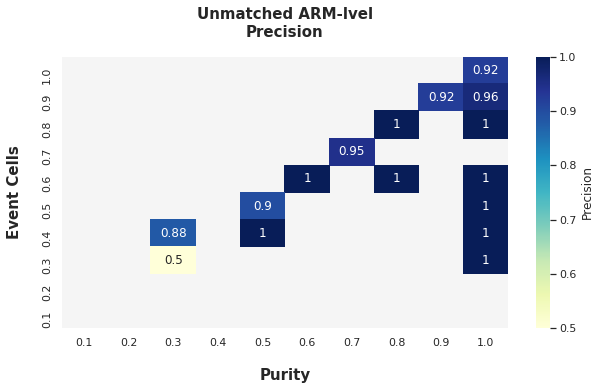

In [71]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
plt.title('Unmatched ARM-lvel\nPrecision',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

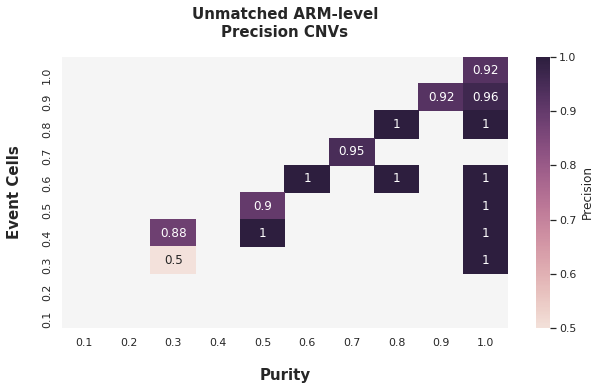

In [72]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched ARM-level\nPrecision CNVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

In [73]:
heat_tinder_cnvs_nodups_PURITY_groups.head(1)

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z,Purity,range_purity,range_cells
0,0,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0,0.246368,"(0.2, 0.3]","(0.3, 0.4]"


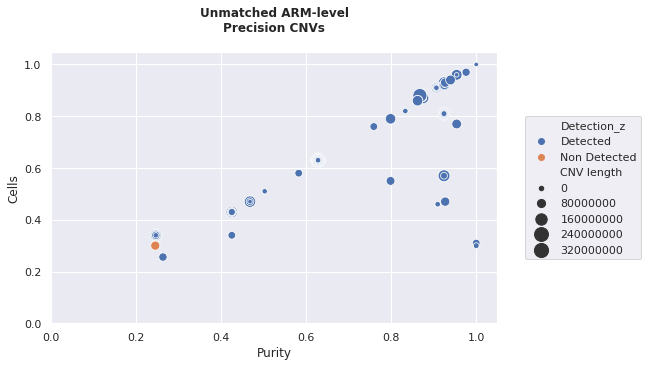

In [77]:
sns.set(rc={'figure.figsize':(8,5)})
heat_tinder_cnvs_nodups_PURITY_groups['CNV length']=heat_tinder_cnvs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity", y="Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],size='CNV length',sizes=(20, 200),alpha=1, data=heat_tinder_cnvs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(0, 1.05))
plt.title('Unmatched ARM-level\nPrecision CNVs',weight='bold')
plt.show()    

In [383]:
heat_tinder_cnvs_nodups_PURITY.columns

Index(['Unnamed: 0', 'index_x', 'chr_seg_x', 'start_seg_x', 'end_seg_x',
       'CNV_x', 'Cells', 'Sample_x', 'Detection_x', 'chr_arm_x', 'start_arm_x',
       'end_arm_x', 'name_arm_x', 'keys_x', 'keys_arms', 'index_y',
       'chr_seg_y', 'start_seg_y', 'end_seg_y', 'CNV_y', 'brass_PS',
       'brass_RC', 'Sample_y', 'Detection_y', 'chr_arm_y', 'start_arm_y',
       'end_arm_y', 'name_arm_y', 'keys_y', 'Detection_z', 'Size_z', 'Purity'],
      dtype='object')

In [385]:
slide=heat_tinder_cnvs_nodups_PURITY[heat_tinder_cnvs_nodups_PURITY['Detection_z']=='Non Detected'][['chr_seg_x', 'start_seg_x', 'end_seg_x','CNV_x', 'Cells', 'Sample_x','chr_arm_x', 'start_arm_x','end_arm_x','Detection_z', 'Size_z', 'Purity']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','chr_arm', 'start_arm','end_arm','Detection', 'Size', 'Purity']
slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['start_arm']=slide['start_arm'].map(int)
slide['end_arm']=slide['end_arm'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,chr_arm,start_arm,end_arm,Detection,Size,Purity
0,0,6,210000,170910001,3.0,0.34,IID_H158612_T01_01_WG01,6p,0,58830166,Non Detected,170700001,0.246368
1,1,6,210000,170910001,3.0,0.34,IID_H158612_T01_01_WG01,6q,61830166,171115067,Non Detected,170700001,0.246368
2,17,13,28866212,115109878,1.0,0.81,IID_H158613_T01_01_WG01,13q,19000000,115169878,Non Detected,86243666,0.924262
3,47,9,195000,38774194,1.0,0.91,IID_H158637_T01_01_WG01,9p,0,47367679,Non Detected,38579194,0.909361
4,48,20,60000,26159211,3.0,0.91,IID_H158637_T01_01_WG01,20p,0,26369569,Non Detected,26099211,0.909361
5,51,9,258740,101309257,2.0,0.30,IID_H158641_T01_01_WG01,9p,0,47367679,Non Detected,101050517,0.245127
6,52,20,60000,62910001,2.0,0.63,IID_H158644_T01_01_WG01,20p,0,26369569,Non Detected,62850001,0.628010
7,53,20,60000,62910001,2.0,0.63,IID_H158644_T01_01_WG01,20q,29369569,63025520,Non Detected,62850001,0.628010
8,89,9,195000,38774194,1.0,0.87,IID_H158665_T01_01_WG01,9p,0,47367679,Non Detected,38579194,0.875197
9,96,20,60000,62910001,1.0,0.43,IID_H158670_T01_01_WG01,20p,0,26369569,Non Detected,62850001,0.425095


In [407]:
print(heat_tinder_cnvs_nodups_PURITY[heat_tinder_cnvs_nodups_PURITY['Detection_z']=='Detected'].shape)
print(heat_tinder_cnvs_nodups_PURITY[heat_tinder_cnvs_nodups_PURITY['Detection_z']=='Non Detected'].shape)

(147, 32)
(11, 32)


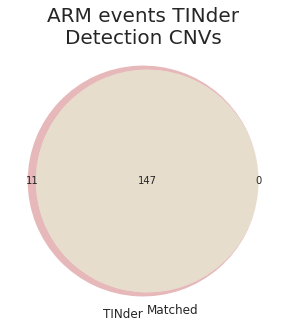

In [410]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (11,0,147), set_labels = ('TINder', 'Matched'))
plt.title('ARM events TINder\nDetection CNVs',fontsize=20,pad=1)
plt.show()

# ARMs: SVs

## 1) TRIPLE:

In [454]:
heat_triple=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/1-HEATMAP_I_example_TRIPLE_MERGE_ARMs_SUPER.tsv',sep='\t')
heat_triple

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
0,0,13.0,13.0,25760508.0,114998761.0,3.0,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,89238253.0
1,1,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_5874537_170921794_IID_H158613_T01_01_WG01,6p_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0
2,2,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_5874537_170921794_IID_H158613_T01_01_WG01,6q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0
3,3,7.0,7.0,61058365.0,159122682.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7q,61054331.0,159138663.0,7_7q,7_61058365_159122682_IID_H158666_T01_01_WG01,7q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,98064317.0
4,4,5.0,5.0,850203.0,46387657.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,5p,0.0,46405641.0,5_5p,5_850203_46387657_IID_H158666_T01_01_WG01,5p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,45537454.0
5,5,4.0,4.0,69567.0,190790246.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,4p,0.0,49660117.0,4_4p,4_69567_190790246_IID_H158666_T01_01_WG01,4p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,190720679.0
6,6,4.0,4.0,69567.0,190790246.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,4q,52660117.0,191154276.0,4_4q,4_69567_190790246_IID_H158666_T01_01_WG01,4q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,190720679.0
7,7,7.0,7.0,82180.0,58047888.0,2.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7p,0.0,58054331.0,7_7p,7_82180_58047888_IID_H158666_T01_01_WG01,7p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,57965708.0
8,8,1.0,1.0,120463044.0,249196349.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,1q,124535434.0,249250621.0,1_1q,1_120463044_249196349_IID_H158666_T01_01_WG01,1q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,128733305.0
9,9,9.0,9.0,211725.0,37164374.0,1.0,1.000000,IID_H158608_T01_01_WG01,Detected,9p,0.0,47367679.0,9_9p,9_211725_37164374_IID_H158608_T01_01_WG01,9p_IID_H158608_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,36952649.0


In [455]:
print(heat_triple.shape)
heat_triple_svs=heat_triple[~(heat_triple['brass_PS'].isnull())]

(185, 31)


In [456]:
heat_triple_svs_nodups=heat_triple_svs.drop_duplicates(subset='keys_arms')
heat_triple_svs_nodups

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
179,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1p_IID_H158613_T01_01_WG01,1.0,1.0,3708400.0,103627577.0,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0.0,121535434.0,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,99919177.0
181,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5q_IID_H158616_T01_01_WG01,5.0,5.0,58077841.0,178223941.0,DEL,5.0,3.0,IID_H158616_T01_01_WG01,Detected,5q,49405641.0,180915260.0,5_5q,5_58077841_178223941_IID_H158616_T01_01_WG01,Detected,120146100.0
183,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9q_IID_H158636_T01_01_WG01,9.0,9.0,25717480.0,127122490.0,DEL,40.0,16.0,IID_H158636_T01_01_WG01,Detected,9q,50367679.0,141213431.0,9_9q,9_25717480_127122490_IID_H158636_T01_01_WG01,Detected,101405010.0


In [457]:
heat_triple_svs_nodups_no66=heat_triple_svs_nodups[~(heat_triple_svs_nodups['Sample_y']=='IID_H158666_T01_01_WG01')]
heat_triple_svs_nodups_no66.shape

(3, 31)

- Purity:

In [458]:
BTG_directories_doc='/home/gutierj2/uk_all/321project_BATTENBERG_directories.list'
BTG_directories=!cat {BTG_directories_doc}

sample_list=[]
purity_list=[]

for n in BTG_directories:
    route=n+'/*_rho_and_psi.txt'
    path=!ls {route}
    
    sample=path[0].split('/')[8].split('_rho')[0]
    
    purity_file=pd.read_csv(path[0],sep='\t')
    for index,row in purity_file.iterrows():
        if(index=='FRAC_GENOME'):
            sample_list.append(sample)
            purity_list.append(row['rho'])
 
table_purity=pd.DataFrame()
table_purity['Sample']=sample_list
table_purity['Sample_y']=sample_list
table_purity['Purity']=purity_list
table_purity=table_purity[['Sample_y','Purity']]

In [459]:
table_purity.sort_values(by=['Sample_y'])

,Sample_y,Purity
0,IID_H158604_T01_01_WG01,0.910000
3,IID_H158605_T01_01_WG01,0.780000
2,IID_H158606_T01_01_WG01,0.850000
1,IID_H158607_T01_01_WG01,0.800000
4,IID_H158608_T01_01_WG01,0.921840
5,IID_H158609_T01_01_WG01,0.504500
7,IID_H158610_T01_01_WG01,0.893000
8,IID_H158611_T01_01_WG01,0.953000
14,IID_H158612_T01_01_WG01,0.344400
15,IID_H158613_T01_01_WG01,0.848320


In [460]:
heat_triple_svs_nodups_PURITY=pd.merge(heat_triple_svs_nodups_no66,table_purity,on='Sample_y')
print(heat_triple_svs_nodups_PURITY.shape)
heat_triple_svs_nodups_PURITY.head()

(3, 32)


,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z,Purity
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1p_IID_H158613_T01_01_WG01,1.0,1.0,3708400.0,103627577.0,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0.0,121535434.0,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,99919177.0,0.848320
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5q_IID_H158616_T01_01_WG01,5.0,5.0,58077841.0,178223941.0,DEL,5.0,3.0,IID_H158616_T01_01_WG01,Detected,5q,49405641.0,180915260.0,5_5q,5_58077841_178223941_IID_H158616_T01_01_WG01,Detected,120146100.0,0.134160
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9q_IID_H158636_T01_01_WG01,9.0,9.0,25717480.0,127122490.0,DEL,40.0,16.0,IID_H158636_T01_01_WG01,Detected,9q,50367679.0,141213431.0,9_9q,9_25717480_127122490_IID_H158636_T01_01_WG01,Detected,101405010.0,0.915671


In [203]:
##COLS:

#heat_triple_svs_nodups_PURITY['Purity_y']
#heat_triple_svs_nodups_PURITY['brass_PS']
#heat_triple_svs_nodups_PURITY['Detection_z']

In [461]:
max(heat_triple_svs_nodups_PURITY['brass_PS'])

40.0

- INTERVALS:

In [462]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [0,4,8,12,16,20,24,28,32,36,40]
heat_triple_svs_nodups_PURITY_groups=heat_triple_svs_nodups_PURITY.copy()

heat_triple_svs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_triple_svs_nodups_PURITY_groups['Purity'], ranges)
heat_triple_svs_nodups_PURITY_groups["range_brass"] = pd.cut(heat_triple_svs_nodups_PURITY_groups['brass_PS'], ranges12)

In [463]:
heat_triple_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

range_purity  range_brass  Detection_z
(0.0, 0.1]    (0, 4]       Detected       0
              (4, 8]       Detected       0
              (8, 12]      Detected       0
              (12, 16]     Detected       0
              (16, 20]     Detected       0
              (20, 24]     Detected       0
              (24, 28]     Detected       0
              (28, 32]     Detected       0
              (32, 36]     Detected       0
              (36, 40]     Detected       0
(0.1, 0.2]    (0, 4]       Detected       0
              (4, 8]       Detected       1
              (8, 12]      Detected       0
              (12, 16]     Detected       0
              (16, 20]     Detected       0
              (20, 24]     Detected       0
              (24, 28]     Detected       0
              (28, 32]     Detected       0
              (32, 36]     Detected       0
              (36, 40]     Detected       0
(0.2, 0.3]    (0, 4]       Detected       0
              (4, 8]       Detected  

In [464]:
matrix_triple=heat_triple_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

sensitivities=[]
for n in range(0,100):
    total=matrix_triple[[n]][0]
    sensitivity=matrix_triple[[n]][0]/matrix_triple[[n]][0]
    sensitivities.append(sensitivity)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [465]:
len(sensitivities)

100

In [466]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [4,8,12,16,20,24,28,32,36,40]
df = pd.DataFrame(np.array(sensitivities).reshape(10,10),index=ranges2, columns=ranges12)

In [467]:
np.array(sensitivities).reshape(10,10)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan,  1., nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.]])

In [468]:
df

,4,8,12,16,20,24,28,32,36,40
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [469]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,4,8,12,16,20,24,28,32,36,40
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [470]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


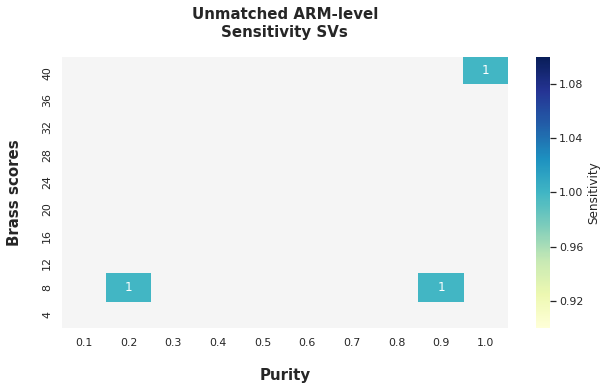

In [472]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
plt.title('Unmatched ARM-level\nSensitivity SVs',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

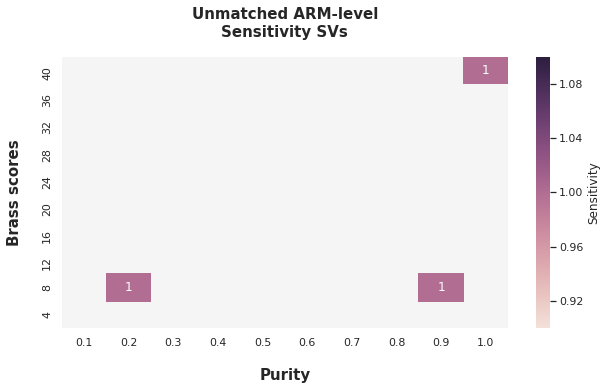

In [473]:
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched ARM-level\nSensitivity SVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

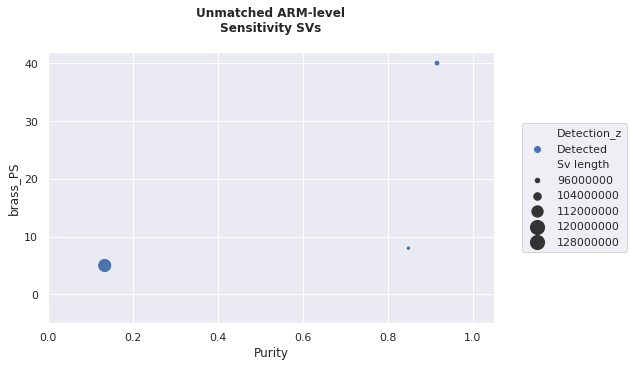

In [474]:
sns.set(rc={'figure.figsize':(8,5)})
heat_triple_svs_nodups_PURITY_groups['Sv length']=heat_triple_svs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity", y="brass_PS", hue="Detection_z",size='Sv length',sizes=(20, 200),alpha=1, data=heat_triple_svs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 42))
plt.title('Unmatched ARM-level\nSensitivity SVs',weight='bold')
plt.show()    

In [477]:
heat_triple_svs_nodups_PURITY_groups.columns

Index(['Unnamed: 0', 'index_x', 'chr_seg_x', 'start_seg_x', 'end_seg_x',
       'CNV_x', 'Cells', 'Sample_x', 'Detection_x', 'chr_arm_x', 'start_arm_x',
       'end_arm_x', 'name_arm_x', 'keys_x', 'keys_arms', 'index_y',
       'chr_seg_y', 'start_seg_y', 'end_seg_y', 'CNV_y', 'brass_PS',
       'brass_RC', 'Sample_y', 'Detection_y', 'chr_arm_y', 'start_arm_y',
       'end_arm_y', 'name_arm_y', 'keys_y', 'Detection_z', 'Size_z', 'Purity',
       'range_purity', 'range_brass', 'Sv length'],
      dtype='object')

In [483]:
slide=heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Detected'][['chr_seg_y', 'start_seg_y', 'end_seg_y','CNV_y', 'brass_PS', 'Sample_y','chr_arm_y', 'start_arm_y','end_arm_y','Detection_z', 'Size_z', 'Purity']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'brass_PS', 'Sample','chr_arm', 'start_arm','end_arm','Detection', 'Size', 'Purity']
slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['start_arm']=slide['start_arm'].map(int)
slide['end_arm']=slide['end_arm'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index()

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,Sample,chr_arm,start_arm,end_arm,Detection,Size,Purity
0,0,1,3708400,103627577,DEL,8.0,IID_H158613_T01_01_WG01,1p,0,121535434,Detected,99919177,0.848320
1,1,5,58077841,178223941,DEL,5.0,IID_H158616_T01_01_WG01,5q,49405641,180915260,Detected,120146100,0.134160
2,2,9,25717480,127122490,DEL,40.0,IID_H158636_T01_01_WG01,9q,50367679,141213431,Detected,101405010,0.915671


In [484]:
print(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Detected'].shape)
print(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'].shape)

(3, 35)
(0, 35)


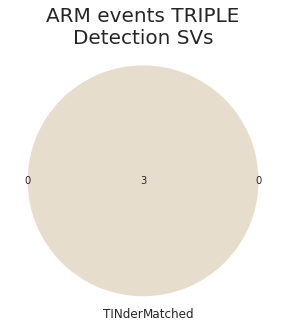

In [548]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,0,3), set_labels = ('TINder', 'Matched'))
plt.title('ARM events TRIPLE\nDetection SVs',fontsize=20,pad=1)
plt.show()

## 2) TINder:

In [486]:
heat_tinder=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/1-HEATMAP_I_example_TINder_MERGE_ARMs_SUPER.tsv',sep='\t')
heat_tinder.head()

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
0,0,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0
1,1,6.0,6.0,210000.0,170910001.0,3.0,0.34,IID_H158612_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_210000_170910001_IID_H158612_T01_01_WG01,6q_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0
2,2,13.0,13.0,28866212.0,115109878.0,1.0,0.81,IID_H158613_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_28866212_115109878_IID_H158613_T01_01_WG01,13q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,86243666.0
3,3,9.0,9.0,195000.0,38774194.0,1.0,0.91,IID_H158637_T01_01_WG01,Non Detected,9p,0.0,47367679.0,9_9p,9_195000_38774194_IID_H158637_T01_01_WG01,9p_IID_H158637_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,38579194.0
4,4,20.0,20.0,60000.0,26159211.0,3.0,0.91,IID_H158637_T01_01_WG01,Non Detected,20p,0.0,26369569.0,20_20p,20_60000_26159211_IID_H158637_T01_01_WG01,20p_IID_H158637_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,26099211.0


In [487]:
print(heat_tinder.shape)
heat_tinder_svs=heat_tinder[~(heat_tinder['brass_PS'].isnull())]

(169, 31)


In [488]:
heat_tinder_svs_nodups=heat_tinder_svs.drop_duplicates(subset='keys_arms')
heat_tinder_svs_nodups.shape

(7, 31)

- Purity:

In [489]:
tinder_purity=pd.read_csv('/work/isabl/home/gutierj2/uk_all/purity/tinder_purity.tsv',sep='\t')
tinder_purity.columns=['Sample_y','Purity']
tinder_purity.head(1)

,Sample_y,Purity
0,IID_H158604_T01_01_WG01,1.0


In [491]:
heat_tinder_svs_nodups.head(1)

,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
158,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1p_IID_H158613_T01_01_WG01,1.0,1.0,3708400.0,103627577.0,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0.0,121535434.0,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,99919177.0


In [492]:
heat_tinder_svs_nodups_PURITY=pd.merge(heat_tinder_svs_nodups,tinder_purity,on='Sample_y')
print(heat_tinder_svs_nodups_PURITY.shape)
heat_tinder_svs_nodups_PURITY.head()

(7, 32)


,Unnamed: 0,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z,Purity
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1p_IID_H158613_T01_01_WG01,1.0,1.0,3708400.0,103627577.0,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0.0,121535434.0,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,99919177.0,0.924262
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5q_IID_H158616_T01_01_WG01,5.0,5.0,26258398.0,150510249.0,DEL,7.0,5.0,IID_H158616_T01_01_WG01,Detected,5q,49405641.0,180915260.0,5_5q,5_26258398_150510249_IID_H158616_T01_01_WG01,Detected,124251851.0,1.000000
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6p_IID_H158618_T01_01_WG01,6.0,6.0,13191446.0,156731674.0,DEL,30.0,0.0,IID_H158618_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_13191446_156731674_IID_H158618_T01_01_WG01,Non Detected,143540228.0,0.867474
3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6q_IID_H158618_T01_01_WG01,6.0,6.0,13191446.0,156731674.0,DEL,30.0,0.0,IID_H158618_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_13191446_156731674_IID_H158618_T01_01_WG01,Non Detected,143540228.0,0.867474
4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9q_IID_H158636_T01_01_WG01,9.0,9.0,25717480.0,127122490.0,DEL,40.0,11.0,IID_H158636_T01_01_WG01,Detected,9q,50367679.0,141213431.0,9_9q,9_25717480_127122490_IID_H158636_T01_01_WG01,Detected,101405010.0,0.673728


In [493]:
##COLS:

#heat_triple_svs_nodups_PURITY['Purity_y']
#heat_triple_svs_nodups_PURITY['brass_PS']
#heat_triple_svs_nodups_PURITY['Detection_z']

In [494]:
max(heat_tinder_svs_nodups_PURITY['brass_PS'])

40.0

- INTERVALS:

In [495]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [0,4,8,12,16,20,24,28,32,36,40]
heat_tinder_svs_nodups_PURITY_groups=heat_tinder_svs_nodups_PURITY.copy()

heat_tinder_svs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_tinder_svs_nodups_PURITY_groups['Purity'], ranges)
heat_tinder_svs_nodups_PURITY_groups["range_brass"] = pd.cut(heat_tinder_svs_nodups_PURITY_groups['brass_PS'], ranges12)

In [496]:
heat_tinder_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

range_purity  range_brass  Detection_z 
(0.0, 0.1]    (0, 4]       Detected        0
                           Non Detected    0
              (4, 8]       Detected        0
                           Non Detected    0
              (8, 12]      Detected        0
                           Non Detected    0
              (12, 16]     Detected        0
                           Non Detected    0
              (16, 20]     Detected        0
                           Non Detected    0
              (20, 24]     Detected        0
                           Non Detected    0
              (24, 28]     Detected        0
                           Non Detected    0
              (28, 32]     Detected        0
                           Non Detected    0
              (32, 36]     Detected        0
                           Non Detected    0
              (36, 40]     Detected        0
                           Non Detected    0
(0.1, 0.2]    (0, 4]       Detected        0
               

In [497]:
matrix_tinder=heat_tinder_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

precisions=[]
for n in range(0,199,2):
    total=matrix_tinder[[n]][0]+matrix_tinder[[n+1]][0]
    precision=matrix_tinder[[n]][0]/total
    precisions.append(precision)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [498]:
precisions[0:4]

[nan, nan, nan, nan]

In [499]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [4,8,12,16,20,24,28,32,36,40]
df = pd.DataFrame(np.array(precisions).reshape(10,10),index=ranges2, columns=ranges12)

In [500]:
np.array(precisions).reshape(10,10)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan,  0., nan, nan, nan, nan, nan, nan, nan,  1.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0., nan, nan],
       [nan,  1.,  0., nan, nan, nan, nan, nan, nan, nan]])

In [501]:
df

,4,8,12,16,20,24,28,32,36,40
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [502]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,4,8,12,16,20,24,28,32,36,40
1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [503]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


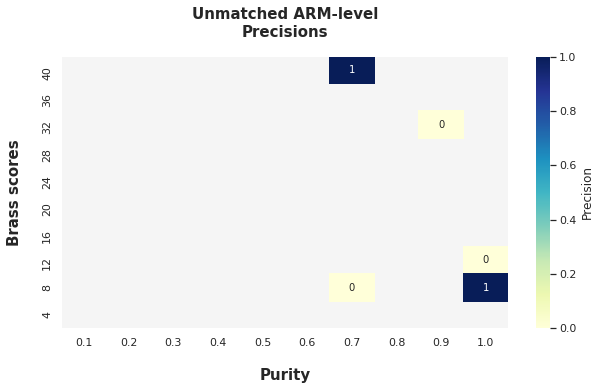

In [505]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
plt.title('Unmatched ARM-level\nPrecisions',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

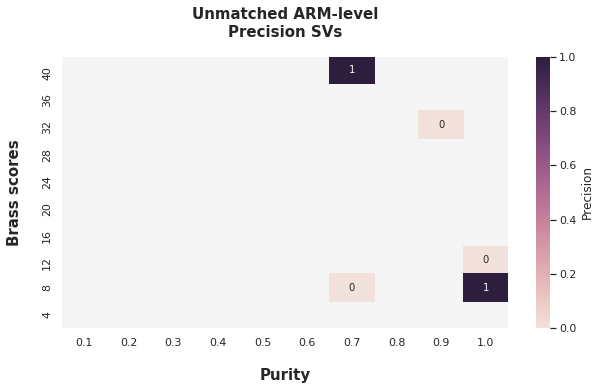

In [506]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched ARM-level\nPrecision SVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

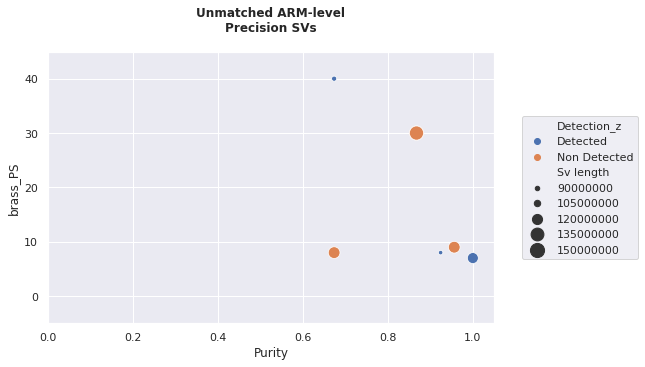

In [507]:
sns.set(rc={'figure.figsize':(8,5)})
heat_tinder_svs_nodups_PURITY_groups['Sv length']=heat_tinder_svs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity", y="brass_PS", hue="Detection_z",size='Sv length',sizes=(20, 200),alpha=1, data=heat_tinder_svs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 45))
plt.title('Unmatched ARM-level\nPrecision SVs',weight='bold')
plt.show()    

In [513]:
heat_tinder_svs_nodups_PURITY.columns

Index(['Unnamed: 0', 'index_x', 'chr_seg_x', 'start_seg_x', 'end_seg_x',
       'CNV_x', 'Cells', 'Sample_x', 'Detection_x', 'chr_arm_x', 'start_arm_x',
       'end_arm_x', 'name_arm_x', 'keys_x', 'keys_arms', 'index_y',
       'chr_seg_y', 'start_seg_y', 'end_seg_y', 'CNV_y', 'brass_PS',
       'brass_RC', 'Sample_y', 'Detection_y', 'chr_arm_y', 'start_arm_y',
       'end_arm_y', 'name_arm_y', 'keys_y', 'Detection_z', 'Size_z', 'Purity'],
      dtype='object')

In [517]:
slide=heat_tinder_svs_nodups_PURITY[['chr_seg_y', 'start_seg_y', 'end_seg_y','CNV_y', 'brass_PS', 'Sample_y','chr_arm_y', 'start_arm_y','end_arm_y','Detection_z', 'Size_z', 'Purity']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','chr_arm', 'start_arm','end_arm','Detection', 'Size', 'Purity']
slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['start_arm']=slide['start_arm'].map(int)
slide['end_arm']=slide['end_arm'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index().sort_values(by=['Detection','Sample'])

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,chr_arm,start_arm,end_arm,Detection,Size,Purity
0,0,1,3708400,103627577,DEL,8.0,IID_H158613_T01_01_WG01,1p,0,121535434,Detected,99919177,0.924262
1,1,5,26258398,150510249,DEL,7.0,IID_H158616_T01_01_WG01,5q,49405641,180915260,Detected,124251851,1.000000
5,4,9,25717480,127122490,DEL,40.0,IID_H158636_T01_01_WG01,9q,50367679,141213431,Detected,101405010,0.673728
2,2,6,13191446,156731674,DEL,30.0,IID_H158618_T01_01_WG01,6p,0,58830166,Non Detected,143540228,0.867474
3,3,6,13191446,156731674,DEL,30.0,IID_H158618_T01_01_WG01,6q,61830166,171115067,Non Detected,143540228,0.867474
4,6,1,16875148,145382613,DUP,9.0,IID_H158627_T01_01_WG01,1p,0,121535434,Non Detected,128507465,0.956237
6,5,1,16875156,145382616,DUP,8.0,IID_H158636_T01_01_WG01,1p,0,121535434,Non Detected,128507460,0.673728


In [509]:
print(heat_tinder_svs_nodups_PURITY[heat_tinder_svs_nodups_PURITY['Detection_z']=='Detected'].shape)
print(heat_tinder_svs_nodups_PURITY[heat_tinder_svs_nodups_PURITY['Detection_z']=='Non Detected'].shape)

(3, 32)
(4, 32)


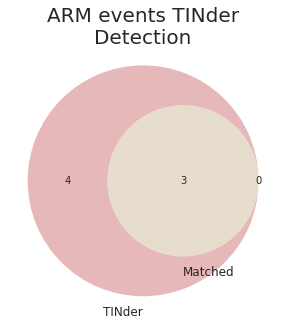

In [512]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (4,0,3), set_labels = ('TINder', 'Matched'))
plt.title('ARM events TINder\nDetection',fontsize=20,pad=1)
plt.show()

# FOCALs: CNVs

In [4]:
##Files
#tinder_detect_CNVs_FOCAL_DETECT.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_tinder_detect_CNVs_FOCAL_DETECT.tsv',sep='\t')
#tinder_detect_SVs_FOCAL_DETECT.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_tinder_detect_SVs_FOCAL_DETECT.tsv',sep='\t')

#triple_detect_CNVs_FOCAL_DETECT.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_triple_detect_CNVs_FOCAL_DETECT.tsv',sep='\t')
#triple_detect_SVs_FOCAL_DETECT.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_triple_detect_SVs_FOCAL_DETECT.tsv',sep='\t')

## 1) TRIPLE:

In [760]:
heat_triple=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_triple_detect_CNVs_FOCAL_DETECT.tsv',sep='\t')
heat_triple.head()

,Unnamed: 0,Unnamed: 0.1,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1.1,chr_seg,end_seg,index,keys,start_seg,Purity,Detection_SV,Detection_z
0,0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.210170,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.884400,Non Detected,Non Detected
1,1,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.884400,Detected,Detected
2,3,3,56.0,1.000000,56.0,0.0,Non Detected,56.0,1.000000,0.218522,IID_H158669_T01_01_WG01,2.0,0.000000,1.0,1.0,2176.0,3,196318492.0,709.0,3_196318471_196318492_IID_H158669_T01_01_WG01,196318471.0,0.218522,Non Detected,Non Detected
3,4,4,1.0,0.245255,1.0,0.0,Non Detected,1.0,0.245255,0.233728,IID_H158611_T01_01_WG01,2.0,0.754745,1.0,1.0,238.0,12,83292503.0,41.0,12_80630636_83292503_IID_H158611_T01_01_WG01,80630636.0,0.953000,Non Detected,Non Detected
4,5,5,1.0,0.314358,1.0,0.0,Non Detected,1.0,0.314358,0.267204,IID_H158649_T01_01_WG01,2.0,0.685642,1.0,1.0,1859.0,16,89985844.0,638.0,16_89020795_89985844_IID_H158649_T01_01_WG01,89020795.0,0.850000,Non Detected,Non Detected


In [761]:
print(heat_triple.shape)

(447, 24)


In [762]:
heat_triple_cnvs_nodups=heat_triple.drop_duplicates(subset='keys')
heat_triple_cnvs_nodups.shape

(447, 24)

- Purity:

In [763]:
BTG_directories_doc='/home/gutierj2/uk_all/321project_BATTENBERG_directories.list'
BTG_directories=!cat {BTG_directories_doc}

sample_list=[]
purity_list=[]

for n in BTG_directories:
    route=n+'/*_rho_and_psi.txt'
    path=!ls {route}
    
    sample=path[0].split('/')[8].split('_rho')[0]
    
    purity_file=pd.read_csv(path[0],sep='\t')
    for index,row in purity_file.iterrows():
        if(index=='FRAC_GENOME'):
            sample_list.append(sample)
            purity_list.append(row['rho'])
 
table_purity=pd.DataFrame()
table_purity['Sample']=sample_list
table_purity['Sample']=sample_list
table_purity['Purity']=purity_list
table_purity=table_purity[['Sample','Purity']]

In [764]:
table_purity.sort_values(by=['Sample'])

,Sample,Purity
0,IID_H158604_T01_01_WG01,0.910000
3,IID_H158605_T01_01_WG01,0.780000
2,IID_H158606_T01_01_WG01,0.850000
1,IID_H158607_T01_01_WG01,0.800000
4,IID_H158608_T01_01_WG01,0.921840
5,IID_H158609_T01_01_WG01,0.504500
7,IID_H158610_T01_01_WG01,0.893000
8,IID_H158611_T01_01_WG01,0.953000
14,IID_H158612_T01_01_WG01,0.344400
15,IID_H158613_T01_01_WG01,0.848320


In [765]:
heat_triple_cnvs_nodups_PURITY=pd.merge(heat_triple_cnvs_nodups,table_purity,on='Sample')
print(heat_triple_cnvs_nodups_PURITY.shape)
heat_triple_cnvs_nodups_PURITY.head()

(447, 25)


,Unnamed: 0,Unnamed: 0.1,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1.1,chr_seg,end_seg,index,keys,start_seg,Purity_x,Detection_SV,Detection_z,Purity_y
0,0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.210170,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.8844,Non Detected,Non Detected,0.8844
1,1,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.8844,Detected,Detected,0.8844
2,239,259,1.0,0.772492,1.0,0.0,Detected,1.0,0.772492,0.683192,IID_H158625_T01_01_WG01,2.0,0.227508,1.0,1.0,800.0,2,42714631.0,NaN,2_34041025_42714631_IID_H158625_T01_01_WG01,34041025.0,NaN,Non Detected,Detected,0.8844
3,240,260,1.0,1.000000,1.0,0.0,Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,801.0,2,49241732.0,NaN,2_42718898_49241732_IID_H158625_T01_01_WG01,42718898.0,NaN,Non Detected,Detected,0.8844
4,241,261,1.0,0.776578,1.0,0.0,Detected,1.0,0.776578,0.686805,IID_H158625_T01_01_WG01,2.0,0.223422,1.0,1.0,802.0,2,53146500.0,NaN,2_49241849_53146500_IID_H158625_T01_01_WG01,49241849.0,NaN,Non Detected,Detected,0.8844


- Patient: IID_H158666_T01_01_WG01

In [766]:
heat_triple_cnvs_nodups_PURITY[heat_triple_cnvs_nodups_PURITY['Sample']=='IID_H158666_T01_01_WG01']

,Unnamed: 0,Unnamed: 0.1,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1.1,chr_seg,end_seg,index,keys,start_seg,Purity_x,Detection_SV,Detection_z,Purity_y
334,52,52,3.0,1.0,2.0,1.0,Non Detected,3.0,1.0,0.93312,IID_H158666_T01_01_WG01,2.0,0.0,1.0,1.0,2077.0,12,26677738.0,688.0,12_26562848_26677738_IID_H158666_T01_01_WG01,26562848.0,0.93312,Non Detected,Non Detected,0.93312
335,53,53,2.0,1.0,2.0,0.0,Non Detected,2.0,1.0,0.93312,IID_H158666_T01_01_WG01,2.0,0.0,1.0,1.0,2072.0,9,22846933.0,687.0,9_20640817_22846933_IID_H158666_T01_01_WG01,20640817.0,0.93312,Detected,Detected,0.93312


In [767]:
heat_triple_cnvs_nodups_PURITY_no66=heat_triple_cnvs_nodups_PURITY[~(heat_triple_cnvs_nodups_PURITY['Sample']=='IID_H158666_T01_01_WG01')]

In [768]:
##COLS:

#heat_triple_cnvs_PURITY['Purity_y']
#heat_triple_cnvs_PURITY['Event_Cells']
#heat_triple_cnvs_PURITY['Detection_z']

- INTERVALS:

In [769]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
heat_triple_cnvs_nodups_PURITY_groups=heat_triple_cnvs_nodups_PURITY_no66.copy()

heat_triple_cnvs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_triple_cnvs_nodups_PURITY_groups['Purity_y'], ranges)
heat_triple_cnvs_nodups_PURITY_groups["range_cells"] = pd.cut(heat_triple_cnvs_nodups_PURITY_groups['Event_Cells'], ranges)

In [770]:
heat_triple_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

range_purity  range_cells  Detection_z 
(0.0, 0.1]    (0.0, 0.1]   Detected         0
                           Non Detected     0
              (0.1, 0.2]   Detected         0
                           Non Detected     0
              (0.2, 0.3]   Detected         0
                           Non Detected     0
              (0.3, 0.4]   Detected         0
                           Non Detected     0
              (0.4, 0.5]   Detected         0
                           Non Detected     0
              (0.5, 0.6]   Detected         0
                           Non Detected     0
              (0.6, 0.7]   Detected         0
                           Non Detected     0
              (0.7, 0.8]   Detected         0
                           Non Detected     0
              (0.8, 0.9]   Detected         0
                           Non Detected     0
              (0.9, 1.0]   Detected         0
                           Non Detected     0
(0.1, 0.2]    (0.0, 0.1]   Detected     

In [771]:
matrix_triple=heat_triple_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

sensitivities=[]
for n in range(0,199,2):
    total=matrix_triple[[n]][0]+matrix_triple[[n+1]][0]
    sensitivity=matrix_triple[[n]][0]/total
    sensitivities.append(sensitivity)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [772]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = pd.DataFrame(np.array(sensitivities).reshape(10,10),index=ranges2, columns=ranges2)

In [773]:
np.array(sensitivities).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 1.        ,        nan,
        1.        ,        nan,        nan,        nan, 1.        ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.66666667],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.8       ],
       [       nan,        nan, 1.        ,        nan,        nan,
               nan,        nan, 1.        , 1.        , 0.75      ],
       [       nan,        nan,        nan,        nan,        nan,
        0.8       ,        nan,        nan,        nan, 0.8       ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 1.        ,        nan, 1.        ],
       [       nan,        nan,        na

In [774]:
df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,1.000000,NaN,1.000,NaN,NaN,NaN,1.000000
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
0.5,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.0,1.000000,0.750000
0.6,NaN,NaN,NaN,NaN,NaN,0.800,NaN,NaN,NaN,0.800000
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.000000
0.8,NaN,NaN,NaN,NaN,NaN,0.000,NaN,1.0,1.000000,0.500000
0.9,1.0,1.0,0.888889,0.666667,1.000,1.000,1.000000,1.0,0.937500,0.922222
1.0,1.0,1.0,0.750000,0.950000,0.875,0.875,0.981132,1.0,0.928571,0.918605


In [775]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,1.0,1.0,0.750000,0.950000,0.875,0.875,0.981132,1.0,0.928571,0.918605
0.9,1.0,1.0,0.888889,0.666667,1.000,1.000,1.000000,1.0,0.937500,0.922222
0.8,NaN,NaN,NaN,NaN,NaN,0.000,NaN,1.0,1.000000,0.500000
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.000000
0.6,NaN,NaN,NaN,NaN,NaN,0.800,NaN,NaN,NaN,0.800000
0.5,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.0,1.000000,0.750000
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
0.2,NaN,NaN,NaN,1.000000,NaN,1.000,NaN,NaN,NaN,1.000000
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [776]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0.1,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.750000,0.888889,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
0.4,0.950000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
0.5,0.875000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,0.875000,1.000000,0.0,NaN,0.8,NaN,NaN,NaN,1.0,NaN
0.7,0.981132,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,1.000000,1.000000,1.0,1.0,NaN,1.00,NaN,NaN,NaN,NaN
0.9,0.928571,0.937500,1.0,NaN,NaN,1.00,NaN,NaN,NaN,NaN
1.0,0.918605,0.922222,0.5,1.0,0.8,0.75,0.8,0.666667,1.0,NaN


In [777]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,NaN,1.0,0.666667,0.8,0.75,0.8,1.0,0.5,0.922222,0.918605
0.9,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.0,0.937500,0.928571
0.8,NaN,NaN,NaN,NaN,1.00,NaN,1.0,1.0,1.000000,1.000000
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.981132
0.6,NaN,1.0,NaN,NaN,NaN,0.8,NaN,0.0,1.000000,0.875000
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.875000
0.4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.950000
0.3,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,0.888889,0.750000
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


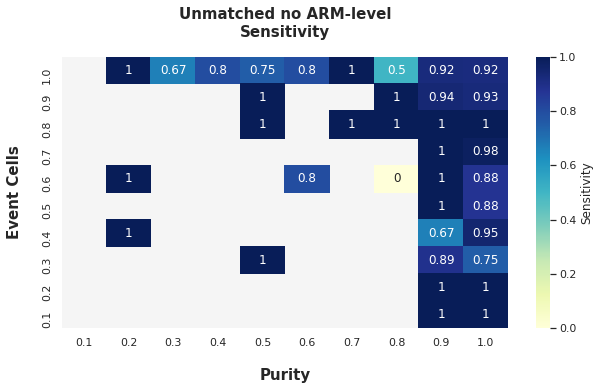

In [778]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
plt.title('Unmatched no ARM-level\nSensitivity',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

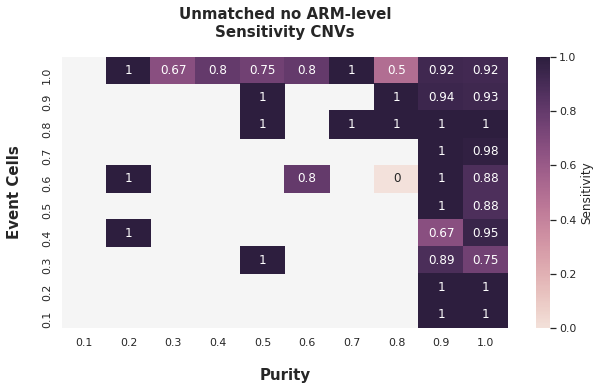

In [779]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched no ARM-level\nSensitivity CNVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

In [780]:
heat_triple_cnvs_nodups_PURITY_groups['Size_z']=heat_triple_cnvs_nodups_PURITY_groups['end_seg']-heat_triple_cnvs_nodups_PURITY_groups['start_seg']

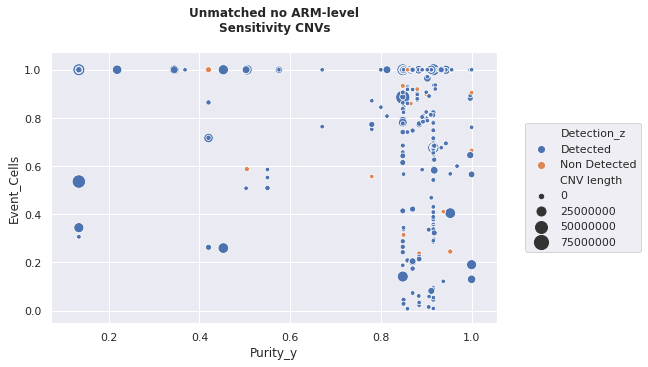

In [781]:
sns.set(rc={'figure.figsize':(8,5)})
heat_triple_cnvs_nodups_PURITY_groups['CNV length']=heat_triple_cnvs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity_y", y="Event_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],size='CNV length',sizes=(20, 200),alpha=1, data=heat_triple_cnvs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.title('Unmatched no ARM-level\nSensitivity CNVs',weight='bold')
plt.show()    

In [782]:
heat_triple_cnvs_nodups_PURITY_groups.head(1)

,Unnamed: 0,Unnamed: 0.1,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1.1,chr_seg,end_seg,index,keys,start_seg,Purity_x,Detection_SV,Detection_z,Purity_y,range_purity,range_cells,Size_z,CNV length
0,0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.21017,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.8844,Non Detected,Non Detected,0.8844,"(0.8, 0.9]","(0.2, 0.3]",1497969.0,1497969


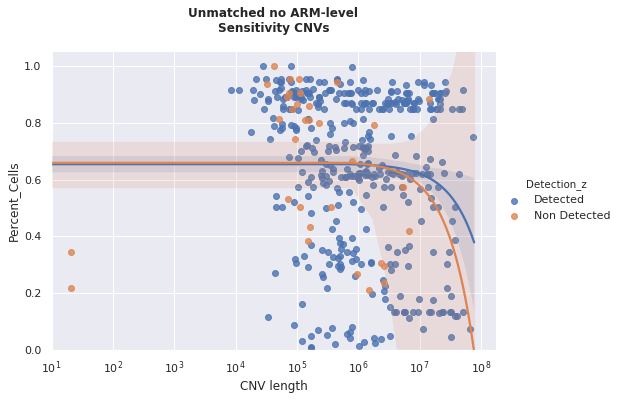

In [807]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=heat_triple_cnvs_nodups_PURITY_groups,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level\nSensitivity CNVs',weight='bold')
plt.show()

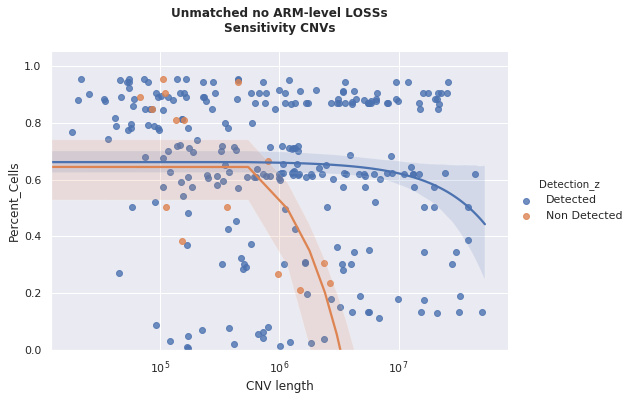

In [808]:
loss=heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['CNV_CNV']<2]
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=loss,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level LOSSs\nSensitivity CNVs',weight='bold')
plt.show() 

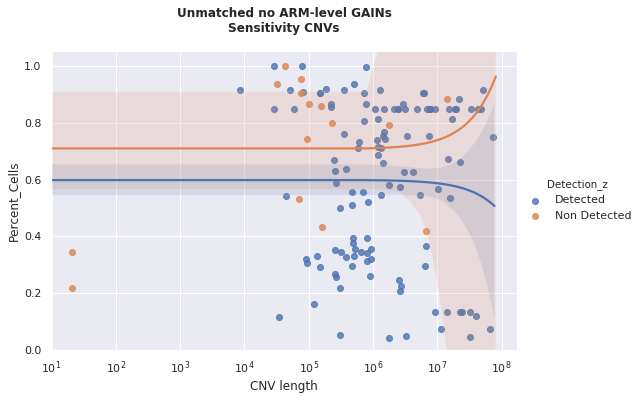

In [801]:
gain=heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['CNV_CNV']>2]
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=gain,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level GAINs\nSensitivity CNVs',weight='bold')
plt.show() 

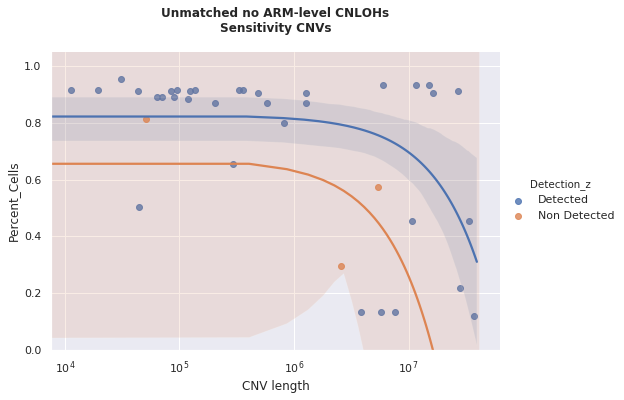

In [803]:
cnloh=heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['CNV_CNV']==2]
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=cnloh,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level CNLOHs\nSensitivity CNVs',weight='bold')
plt.show() 

In [549]:
heat_triple_cnvs_nodups_PURITY_groups.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Clone_CNV', 'Clone_Cells', 'Clone_Maj',
       'Clone_Min', 'Detection_CNVs', 'CNV_CNV', 'Event_Cells',
       'Percent_Cells', 'Sample', 'Subclone_CNV', 'Subclone_Cells',
       'Subclone_Maj', 'Subclone_Min', 'Unnamed: 0.1.1', 'chr_seg', 'end_seg',
       'index', 'keys', 'start_seg', 'Purity_x', 'Detection_SV', 'Detection_z',
       'Purity_y', 'range_purity', 'range_cells', 'Size_z', 'CNV length'],
      dtype='object')

In [542]:
slide=heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'][['chr_seg', 'start_seg', 'end_seg','CNV_CNV', 'Event_Cells', 'Sample','Detection_z', 'Size_z', 'Purity_y']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','Detection', 'Size', 'Purity']
slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,Size,Purity
0,211,7,158188165,158349666,3.0,0.556753,IID_H158605_T01_01_WG01,Non Detected,161501,0.780000
1,261,13,114745664,114978862,3.0,1.000000,IID_H158607_T01_01_WG01,Non Detected,233198,0.800000
2,50,16,87417706,89998957,2.0,0.587526,IID_H158609_T01_01_WG01,Non Detected,2581251,0.504500
3,51,3,35805373,35916519,1.0,1.000000,IID_H158609_T01_01_WG01,Non Detected,111146,0.504500
4,52,13,114617056,114978862,1.0,1.000000,IID_H158609_T01_01_WG01,Non Detected,361806,0.504500
5,19,12,80630636,83292503,1.0,0.245255,IID_H158611_T01_01_WG01,Non Detected,2661867,0.953000
6,196,3,196318471,196318492,35.0,1.000000,IID_H158612_T01_01_WG01,Non Detected,21,0.344400
7,148,22,40472202,42274034,3.0,0.933179,IID_H158613_T01_01_WG01,Non Detected,1801832,0.848320
8,278,1,169190450,169348665,3.0,1.000000,IID_H158614_T01_01_WG01,Non Detected,158215,0.858655
9,317,14,107179268,107289436,1.0,1.000000,IID_H158617_T01_01_WG01,Non Detected,110168,0.906300


In [543]:
print(heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Detected'].shape)
print(heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'].shape)

(412, 29)
(33, 29)


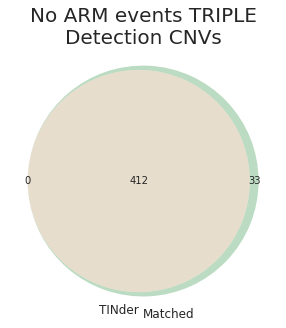

In [546]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,33,412), set_labels = ('TINder', 'Matched'))
plt.title('No ARM events TRIPLE\nDetection CNVs',fontsize=20,pad=1)
plt.show()

- SIZES:

In [558]:
sizes_TRIPLE_detected=pd.DataFrame(heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Detected'],columns=['Size_z'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_triple_cnvs_nodups_PURITY_groups[heat_triple_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'],columns=['Size_z'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [566]:
average_size=sum(sizes_TRIPLE_detected['Size_z'])/len(sizes_TRIPLE_detected['Size_z'])
print('sizes_TRIPLE_detected\t',average_size)

average_size=sum(sizes_TRIPLE_nondetected['Size_z'])/len(sizes_TRIPLE_nondetected['Size_z'])
print('sizes_TRIPLE_nondetected\t',average_size)

sizes_TRIPLE_detected	 5338767.237864078
sizes_TRIPLE_nondetected	 1263669.1515151516


In [560]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

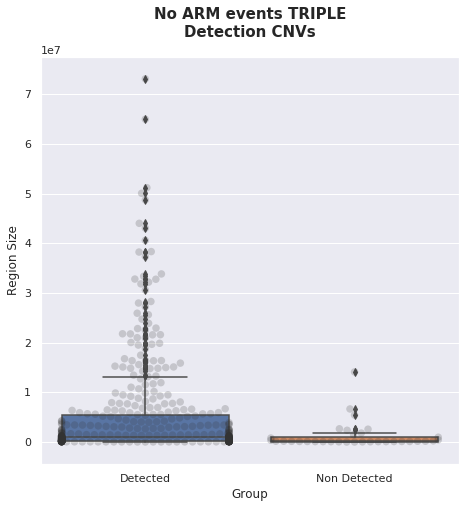

In [563]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TRIPLE\nDetection CNVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

In [576]:
#Function to tag GAINs/LOSSs/CNLOHs

def label_focal (row):
    if (row['CNV_CNV']>2):
        return 'GAINs'
    if (row['CNV_CNV']<2):
        return 'LOSSs'
    if (row['CNV_CNV']==2):
        return 'CNLOHs'


In [577]:
heat_triple_cnvs_nodups_PURITY_groups_teng=heat_triple_cnvs_nodups_PURITY_groups.copy()

heat_triple_cnvs_nodups_PURITY_groups_teng['Type']=heat_triple_cnvs_nodups_PURITY_groups_teng.apply(lambda row: label_focal(row), axis=1)

In [578]:
sizes_TRIPLE_detected=pd.DataFrame(heat_triple_cnvs_nodups_PURITY_groups_teng[heat_triple_cnvs_nodups_PURITY_groups_teng['Detection_z']=='Detected'],columns=['Size_z','Type'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_triple_cnvs_nodups_PURITY_groups_teng[heat_triple_cnvs_nodups_PURITY_groups_teng['Detection_z']=='Non Detected'],columns=['Size_z','Type'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [579]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

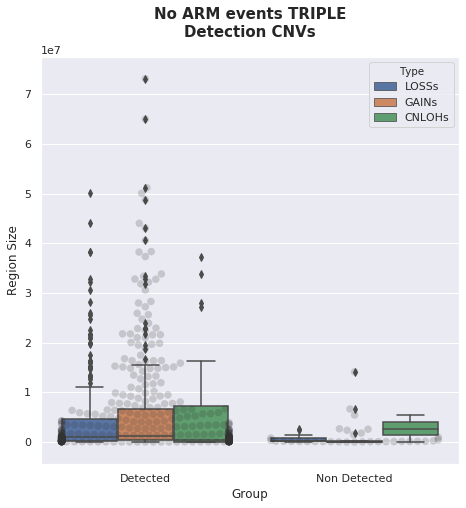

In [581]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size',hue='Type', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TRIPLE\nDetection CNVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

## 2) TINder:

In [809]:
heat_tinder=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_tinder_detect_CNVs_FOCAL_DETECT.tsv',sep='\t')
heat_tinder.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity,Percent_Cells,Detection_SV,Detection_z
0,0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273,Non Detected,Non Detected
1,1,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected
2,2,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected
3,3,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected
4,4,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected


In [810]:
print(heat_tinder.shape)
heat_tinder_cnvs_nodups=heat_tinder.drop_duplicates(subset='keys')
heat_tinder_cnvs_nodups.shape

(792, 17)


(792, 17)

- Purity:

In [811]:
tinder_purity=pd.read_csv('/work/isabl/home/gutierj2/uk_all/purity/tinder_purity.tsv',sep='\t')
tinder_purity.columns=['Sample','Purity']
tinder_purity.head(1)

,Sample,Purity
0,IID_H158604_T01_01_WG01,1.0


In [812]:
heat_tinder_cnvs_nodups_PURITY=pd.merge(heat_tinder_cnvs_nodups,tinder_purity,on='Sample')
print(heat_tinder_cnvs_nodups_PURITY.shape)
heat_tinder_cnvs_nodups_PURITY.head()

(792, 18)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity_x,Percent_Cells,Detection_SV,Detection_z,Purity_y
0,0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273,Non Detected,Non Detected,1.0
1,1,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected,1.0
2,2,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected,1.0
3,3,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected,1.0
4,4,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected,1.0


In [813]:
##COLS:

#heat_tinder_cnvs_PURITY['Purity']
#heat_tinder_cnvs_PURITY['Fraction']
#heat_tinder_cnvs_PURITY['Detection_z']

- INTERVALS:

In [814]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
heat_tinder_cnvs_nodups_PURITY_groups=heat_tinder_cnvs_nodups_PURITY.copy()

heat_tinder_cnvs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_tinder_cnvs_nodups_PURITY_groups['Purity_y'], ranges)
heat_tinder_cnvs_nodups_PURITY_groups["range_cells"] = pd.cut(heat_tinder_cnvs_nodups_PURITY_groups['Event_Cells'], ranges)

In [815]:
heat_tinder_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

range_purity  range_cells  Detection_z 
(0.0, 0.1]    (0.0, 0.1]   Detected          0
                           Non Detected      0
              (0.1, 0.2]   Detected          0
                           Non Detected      0
              (0.2, 0.3]   Detected          0
                           Non Detected      0
              (0.3, 0.4]   Detected          0
                           Non Detected      0
              (0.4, 0.5]   Detected          0
                           Non Detected      0
              (0.5, 0.6]   Detected          0
                           Non Detected      0
              (0.6, 0.7]   Detected          0
                           Non Detected      0
              (0.7, 0.8]   Detected          0
                           Non Detected      0
              (0.8, 0.9]   Detected          0
                           Non Detected      0
              (0.9, 1.0]   Detected          0
                           Non Detected      0
(0.1, 0.2]    (0.0, 

In [816]:
matrix_tinder=heat_tinder_cnvs_nodups_PURITY_groups.groupby([ "range_purity",'range_cells',"Detection_z"]).size()

precisions=[]
for n in range(0,199,2):
    total=matrix_tinder[[n]][0]+matrix_tinder[[n+1]][0]
    precision=matrix_tinder[[n]][0]/total
    precisions.append(precision)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [817]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
df = pd.DataFrame(np.array(precisions).reshape(10,10),index=ranges2, columns=ranges2)

In [818]:
np.array(precisions).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan, 0.5       , 0.8125    ,        nan,
               nan,        nan, 1.        ,        nan, 0.22222222],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan, 0.        ,        nan, 0.57142857,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.        ,        nan,
        0.68421053,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.4       , 0.5       ,
               nan, 0.97959184,        nan,        nan,        nan],
       [       nan,        nan, 0.       

In [819]:
df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,0.50,0.8125,NaN,NaN,NaN,1.000000,NaN,0.222222
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,0.00,NaN,0.571429,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,0.0000,NaN,0.684211,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,0.4000,0.500000,NaN,0.979592,NaN,NaN,NaN
0.8,NaN,NaN,0.00,1.0000,1.000000,1.000000,1.000000,0.791667,NaN,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789474,NaN
1.0,NaN,NaN,0.25,0.7200,0.611111,0.695652,0.800000,0.777778,0.925000,0.577049


In [820]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,NaN,NaN,0.25,0.7200,0.611111,0.695652,0.800000,0.777778,0.925000,0.577049
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789474,NaN
0.8,NaN,NaN,0.00,1.0000,1.000000,1.000000,1.000000,0.791667,NaN,NaN
0.7,NaN,NaN,NaN,0.4000,0.500000,NaN,0.979592,NaN,NaN,NaN
0.6,NaN,NaN,NaN,0.0000,NaN,0.684211,NaN,NaN,NaN,NaN
0.5,NaN,NaN,0.00,NaN,0.571429,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,0.50,0.8125,NaN,NaN,NaN,1.000000,NaN,0.222222
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [821]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.250000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.500000,NaN,NaN
0.4,0.720000,NaN,1.000000,0.400000,0.000000,NaN,NaN,0.812500,NaN,NaN
0.5,0.611111,NaN,1.000000,0.500000,NaN,0.571429,NaN,NaN,NaN,NaN
0.6,0.695652,NaN,1.000000,NaN,0.684211,NaN,NaN,NaN,NaN,NaN
0.7,0.800000,NaN,1.000000,0.979592,NaN,NaN,NaN,NaN,NaN,NaN
0.8,0.777778,NaN,0.791667,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
0.9,0.925000,0.789474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,0.577049,NaN,NaN,NaN,NaN,NaN,NaN,0.222222,NaN,NaN


In [822]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1.0,NaN,NaN,0.222222,NaN,NaN,NaN,NaN,NaN,NaN,0.577049
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789474,0.925000
0.8,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.791667,NaN,0.777778
0.7,NaN,NaN,NaN,NaN,NaN,NaN,0.979592,1.000000,NaN,0.800000
0.6,NaN,NaN,NaN,NaN,NaN,0.684211,NaN,1.000000,NaN,0.695652
0.5,NaN,NaN,NaN,NaN,0.571429,NaN,0.500000,1.000000,NaN,0.611111
0.4,NaN,NaN,0.812500,NaN,NaN,0.000000,0.400000,1.000000,NaN,0.720000
0.3,NaN,NaN,0.500000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.250000
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


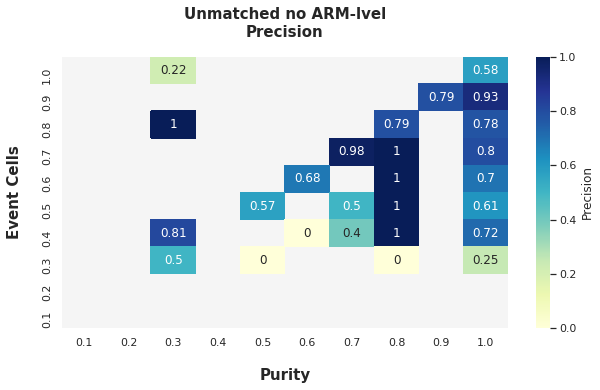

In [823]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
plt.title('Unmatched no ARM-lvel\nPrecision',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

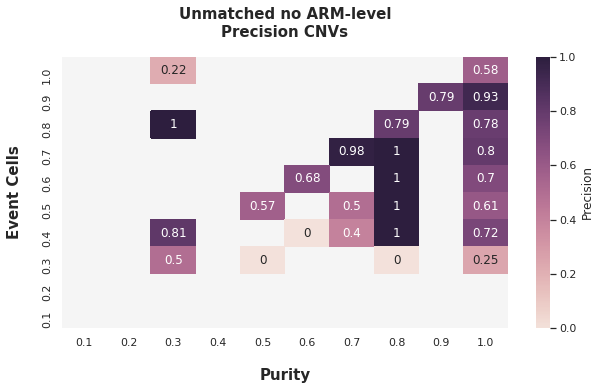

In [824]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched no ARM-level\nPrecision CNVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Event Cells',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

In [825]:
heat_tinder_cnvs_nodups_PURITY_groups['Size_z']=heat_tinder_cnvs_nodups_PURITY_groups['end_seg']-heat_tinder_cnvs_nodups_PURITY_groups['start_seg']
heat_tinder_cnvs_nodups_PURITY_groups.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity_x,Percent_Cells,Detection_SV,Detection_z,Purity_y,range_purity,range_cells,Size_z
0,0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273,Non Detected,Non Detected,1.0,"(0.9, 1.0]","(0.2, 0.3]",851151


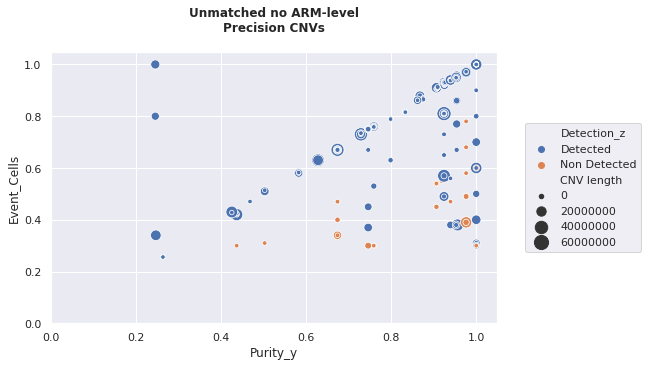

In [826]:
sns.set(rc={'figure.figsize':(8,5)})
heat_tinder_cnvs_nodups_PURITY_groups['CNV length']=heat_tinder_cnvs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity_y", y="Event_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],size='CNV length',sizes=(20, 200),alpha=1, data=heat_tinder_cnvs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(0, 1.05))
plt.title('Unmatched no ARM-level\nPrecision CNVs',weight='bold')
plt.show()    

In [827]:
heat_tinder_cnvs_nodups_PURITY_groups.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity_x,Percent_Cells,Detection_SV,Detection_z,Purity_y,range_purity,range_cells,Size_z,CNV length
0,0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273,Non Detected,Non Detected,1.0,"(0.9, 1.0]","(0.2, 0.3]",851151,851151


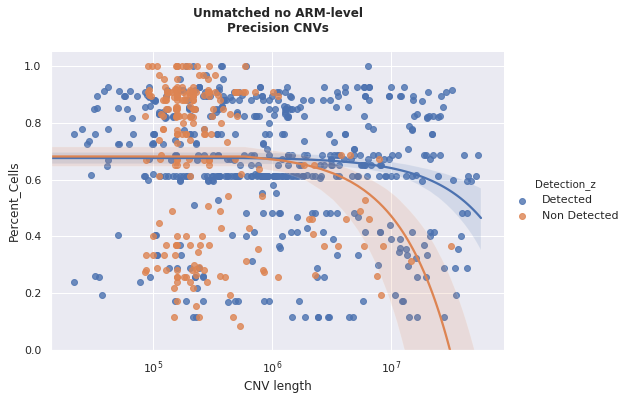

In [829]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=heat_tinder_cnvs_nodups_PURITY_groups,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level\nPrecision CNVs',weight='bold')
plt.show()

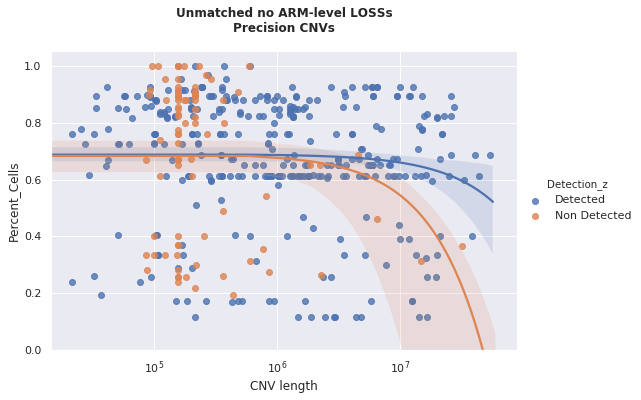

In [830]:
loss=heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['CNV_CNV']<2]
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=loss,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level LOSSs\nPrecision CNVs',weight='bold')
plt.show() 

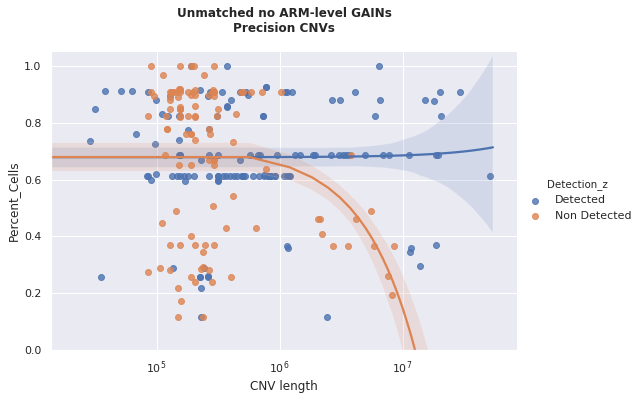

In [831]:
gain=heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['CNV_CNV']>2]
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=gain,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level GAINs\nPrecision CNVs',weight='bold')
plt.show() 

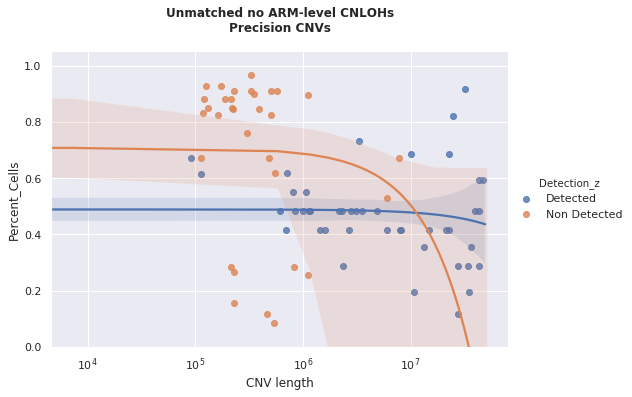

In [832]:
cnloh=heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['CNV_CNV']==2]
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="CNV length", y="Percent_Cells", hue="Detection_z",hue_order=['Detected','Non Detected'],data=cnloh,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(0, 1.05))
plt.xscale('log')
plt.title('Unmatched no ARM-level CNLOHs\nPrecision CNVs',weight='bold')
plt.show() 

In [600]:
heat_tinder_cnvs_nodups_PURITY_groups.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'chr_seg', 'start_seg',
       'end_seg', 'CNV_CNV', 'CN1', 'CN2', 'Event_Cells', 'Sample', 'keys',
       'Detection_CNVs', 'Purity_x', 'Percent_Cells', 'Detection_SV',
       'Detection_z', 'Purity_y', 'range_purity', 'range_cells', 'Size_z',
       'CNV length'],
      dtype='object')

In [603]:
slide=heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'][['chr_seg', 'start_seg', 'end_seg','CNV_CNV', 'Event_Cells', 'Sample','Detection_z', 'Size_z', 'Purity_y']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','Detection', 'Size', 'Purity']
slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index().head()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,Size,Purity
0,0,1,152244173,153095324,1,0.3,IID_H158604_T01_01_WG01,Non Detected,851151,1.0
1,1,12,6612848,6792009,3,1.0,IID_H158604_T01_01_WG01,Non Detected,179161,1.0
2,2,12,7995806,8124902,3,1.0,IID_H158604_T01_01_WG01,Non Detected,129096,1.0
3,3,15,56905549,57062916,1,1.0,IID_H158604_T01_01_WG01,Non Detected,157367,1.0
4,4,16,62191694,62407964,1,1.0,IID_H158604_T01_01_WG01,Non Detected,216270,1.0


In [604]:
print(heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['Detection_z']=='Detected'].shape)
print(heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'].shape)

(566, 22)
(226, 22)


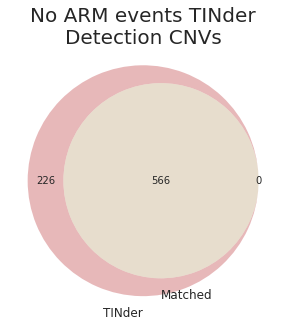

In [605]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (226,0,566), set_labels = ('TINder', 'Matched'))
plt.title('No ARM events TINder\nDetection CNVs',fontsize=20,pad=1)
plt.show()

- SIZES:

In [606]:
sizes_TINder_detected=pd.DataFrame(heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['Detection_z']=='Detected'],columns=['Size_z'])
sizes_TINder_detected['Group']='Detected'

sizes_TINder_nondetected=pd.DataFrame(heat_tinder_cnvs_nodups_PURITY_groups[heat_tinder_cnvs_nodups_PURITY_groups['Detection_z']=='Non Detected'],columns=['Size_z'])
sizes_TINder_nondetected['Group']='Non Detected'

In [607]:
average_size=sum(sizes_TINder_detected['Size_z'])/len(sizes_TINder_detected['Size_z'])
print('sizes_TRIPLE_detected\t',average_size)

average_size=sum(sizes_TINder_nondetected['Size_z'])/len(sizes_TINder_nondetected['Size_z'])
print('sizes_TRIPLE_nondetected\t',average_size)

sizes_TRIPLE_detected	 4185086.2879858655
sizes_TRIPLE_nondetected	 818882.5530973452


In [608]:
sizes_TOTAL_df=sizes_TINder_detected.copy()
sizes_TOTAL_df=sizes_TINder_detected.append(sizes_TINder_nondetected,ignore_index=True)
#sizes_TOTAL_df

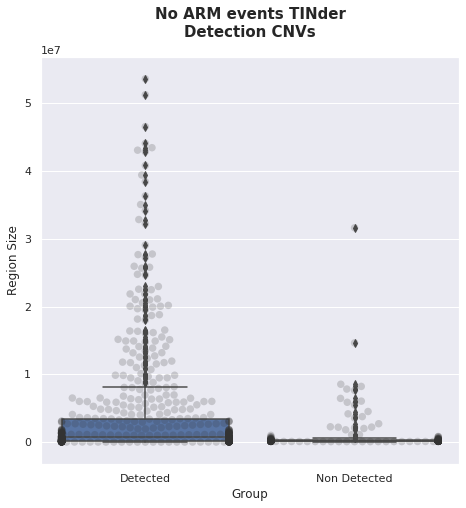

In [609]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TINder\nDetection CNVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

In [610]:
#Function to tag GAINs/LOSSs/CNLOHs

def label_focal (row):
    if (row['CNV_CNV']>2):
        return 'GAINs'
    if (row['CNV_CNV']<2):
        return 'LOSSs'
    if (row['CNV_CNV']==2):
        return 'CNLOHs'


In [611]:
heat_tinder_cnvs_nodups_PURITY_groups_teng=heat_tinder_cnvs_nodups_PURITY_groups.copy()

heat_tinder_cnvs_nodups_PURITY_groups_teng['Type']=heat_tinder_cnvs_nodups_PURITY_groups_teng.apply(lambda row: label_focal(row), axis=1)

In [612]:
sizes_TRIPLE_detected=pd.DataFrame(heat_tinder_cnvs_nodups_PURITY_groups_teng[heat_tinder_cnvs_nodups_PURITY_groups_teng['Detection_z']=='Detected'],columns=['Size_z','Type'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_tinder_cnvs_nodups_PURITY_groups_teng[heat_tinder_cnvs_nodups_PURITY_groups_teng['Detection_z']=='Non Detected'],columns=['Size_z','Type'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [613]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

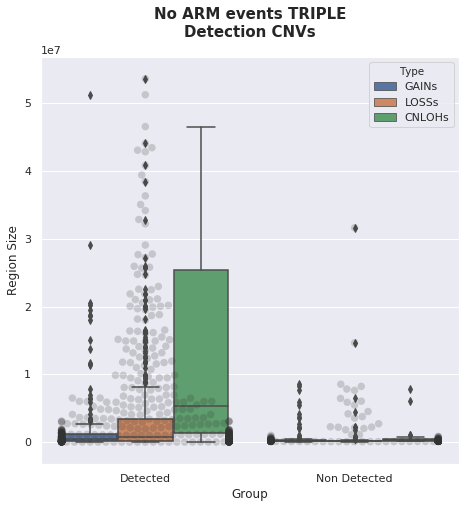

In [614]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size',hue='Type', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TRIPLE\nDetection CNVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

# FOCALs: SVs

## 1) TRIPLE:

In [833]:
heat_triple=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_triple_detect_SVs_FOCAL_DETECT.tsv',sep='\t')
heat_triple.head()

,Unnamed: 0,Unnamed: 0.1,index,Detection_SVs,ID,chr_seg,end_seg,start_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV,Detection_z
0,0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8,Non Detected,Detected
1,1,1,3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9,Non Detected,Detected
2,2,2,12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13,Non Detected,Non Detected
3,3,3,14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8,Non Detected,Non Detected
4,4,4,16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28,Non Detected,Non Detected


In [834]:
print(heat_triple.shape)

(660, 17)


In [835]:
heat_triple_svs_nodups=heat_triple.drop_duplicates(subset='keys')
heat_triple_svs_nodups.shape

(660, 17)

In [836]:
heat_triple_svs_nodups_no66=heat_triple_svs_nodups[~(heat_triple_svs_nodups['Sample']=='IID_H158666_T01_01_WG01')]
heat_triple_svs_nodups_no66.shape

(648, 17)

- Purity:

In [837]:
BTG_directories_doc='/home/gutierj2/uk_all/321project_BATTENBERG_directories.list'
BTG_directories=!cat {BTG_directories_doc}

sample_list=[]
purity_list=[]

for n in BTG_directories:
    route=n+'/*_rho_and_psi.txt'
    path=!ls {route}
    
    sample=path[0].split('/')[8].split('_rho')[0]
    
    purity_file=pd.read_csv(path[0],sep='\t')
    for index,row in purity_file.iterrows():
        if(index=='FRAC_GENOME'):
            sample_list.append(sample)
            purity_list.append(row['rho'])
 
table_purity=pd.DataFrame()
table_purity['Sample']=sample_list
table_purity['Sample_y']=sample_list
table_purity['Purity']=purity_list
table_purity=table_purity[['Sample','Purity']]

In [838]:
table_purity.sort_values(by=['Sample'])

,Sample,Purity
0,IID_H158604_T01_01_WG01,0.910000
3,IID_H158605_T01_01_WG01,0.780000
2,IID_H158606_T01_01_WG01,0.850000
1,IID_H158607_T01_01_WG01,0.800000
4,IID_H158608_T01_01_WG01,0.921840
5,IID_H158609_T01_01_WG01,0.504500
7,IID_H158610_T01_01_WG01,0.893000
8,IID_H158611_T01_01_WG01,0.953000
14,IID_H158612_T01_01_WG01,0.344400
15,IID_H158613_T01_01_WG01,0.848320


In [839]:
heat_triple_svs_nodups_PURITY=pd.merge(heat_triple_svs_nodups_no66,table_purity,on='Sample')
print(heat_triple_svs_nodups_PURITY.shape)
heat_triple_svs_nodups_PURITY.head()

(648, 18)


,Unnamed: 0,Unnamed: 0.1,index,Detection_SVs,ID,chr_seg,end_seg,start_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV,Detection_z,Purity
0,0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8,Non Detected,Detected,0.3444
1,1,1,3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9,Non Detected,Detected,0.3444
2,2,2,12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13,Non Detected,Non Detected,0.3444
3,3,3,14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8,Non Detected,Non Detected,0.3444
4,4,4,16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28,Non Detected,Non Detected,0.3444


In [840]:
##COLS:

#heat_triple_svs_nodups_PURITY['Purity_y']
#heat_triple_svs_nodups_PURITY['brass_PS']
#heat_triple_svs_nodups_PURITY['Detection_z']

In [841]:
max(heat_triple_svs_nodups_PURITY['brass_PS'])

120

- INTERVALS:

In [842]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [0,12,24,36,48,60,72,84,96,108,120]
heat_triple_svs_nodups_PURITY_groups=heat_triple_svs_nodups_PURITY.copy()

heat_triple_svs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_triple_svs_nodups_PURITY_groups['Purity'], ranges)
heat_triple_svs_nodups_PURITY_groups["range_brass"] = pd.cut(heat_triple_svs_nodups_PURITY_groups['brass_PS'], ranges12)

In [843]:
heat_triple_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

range_purity  range_brass  Detection_z 
(0.0, 0.1]    (0, 12]      Detected         0
                           Non Detected     0
              (12, 24]     Detected         0
                           Non Detected     0
              (24, 36]     Detected         0
                           Non Detected     0
              (36, 48]     Detected         0
                           Non Detected     0
              (48, 60]     Detected         0
                           Non Detected     0
              (60, 72]     Detected         0
                           Non Detected     0
              (72, 84]     Detected         0
                           Non Detected     0
              (84, 96]     Detected         0
                           Non Detected     0
              (96, 108]    Detected         0
                           Non Detected     0
              (108, 120]   Detected         0
                           Non Detected     0
(0.1, 0.2]    (0, 12]      Detected     

In [844]:
matrix_triple=heat_triple_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

sensitivities=[]
for n in range(0,200,2):
    total=matrix_triple[[n]][0]+matrix_triple[[n+1]][0]
    sensitivity=matrix_triple[[n]][0]/total
    sensitivities.append(sensitivity)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [845]:
len(sensitivities)

100

In [846]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [12,24,36,48,60,72,84,96,108,120]
df = pd.DataFrame(np.array(sensitivities).reshape(10,10),index=ranges2, columns=ranges12)

In [847]:
np.array(sensitivities).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.78947368, 0.33333333,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.44444444, 0.33333333, 1.        ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.45454545, 0.33333333,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.        , 0.44444444, 1.        ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.77777778, 0.66129032, 0.7       , 0.5       ,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan, 0.6666666

In [848]:
df

,12,24,36,48,60,72,84,96,108,120
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.789474,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.444444,0.333333,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.454545,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,1.000000,0.444444,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,0.777778,0.661290,0.700000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,0.666667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.9,0.769231,0.760000,0.760870,0.795455,0.730769,0.833333,1.0,0.666667,0.0,NaN
1.0,0.500000,0.620000,0.683333,0.750000,0.567568,0.705882,1.0,NaN,0.0,0.666667


In [849]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,12,24,36,48,60,72,84,96,108,120
1.0,0.500000,0.620000,0.683333,0.750000,0.567568,0.705882,1.0,NaN,0.0,0.666667
0.9,0.769231,0.760000,0.760870,0.795455,0.730769,0.833333,1.0,0.666667,0.0,NaN
0.8,NaN,NaN,0.666667,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,0.777778,0.661290,0.700000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
0.5,1.000000,0.444444,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.454545,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.444444,0.333333,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.789474,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [850]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
12,0.500000,0.769231,NaN,NaN,0.777778,1.000000,0.454545,0.444444,0.789474,NaN
24,0.620000,0.760000,NaN,NaN,0.661290,0.444444,0.333333,0.333333,0.333333,NaN
36,0.683333,0.760870,0.666667,NaN,0.700000,1.000000,NaN,1.000000,NaN,NaN
48,0.750000,0.795455,1.000000,NaN,0.500000,NaN,NaN,NaN,NaN,NaN
60,0.567568,0.730769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.705882,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [851]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833333,0.705882
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730769,0.567568
48,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,1.000000,0.795455,0.750000
36,NaN,NaN,1.000000,NaN,1.000000,0.700000,NaN,0.666667,0.760870,0.683333
24,NaN,0.333333,0.333333,0.333333,0.444444,0.661290,NaN,NaN,0.760000,0.620000
12,NaN,0.789474,0.444444,0.454545,1.000000,0.777778,NaN,NaN,0.769231,0.500000


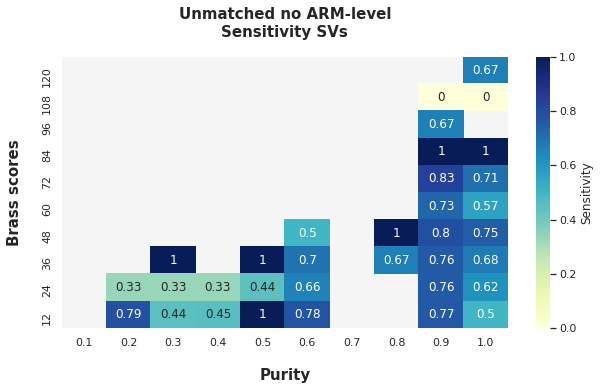

In [852]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
plt.title('Unmatched no ARM-level\nSensitivity SVs',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

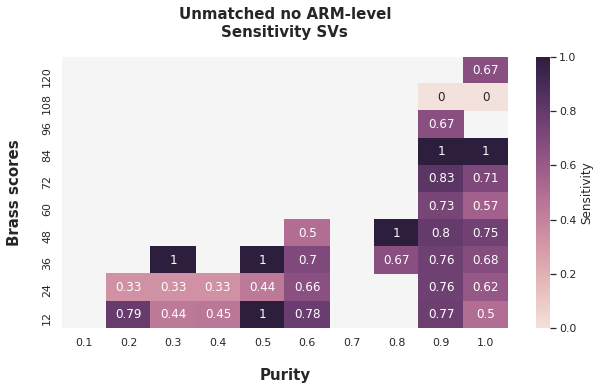

In [853]:
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched no ARM-level\nSensitivity SVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

In [854]:
heat_triple_svs_nodups_PURITY_groups['Size_z']=heat_triple_svs_nodups_PURITY_groups['end_seg']-heat_triple_svs_nodups_PURITY_groups['start_seg']
heat_triple_svs_nodups_PURITY_groups.head(1)

,Unnamed: 0,Unnamed: 0.1,index,Detection_SVs,ID,chr_seg,end_seg,start_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV,Detection_z,Purity,range_purity,range_brass,Size_z
0,0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8,Non Detected,Detected,0.3444,"(0.3, 0.4]","(0, 12]",11606.0


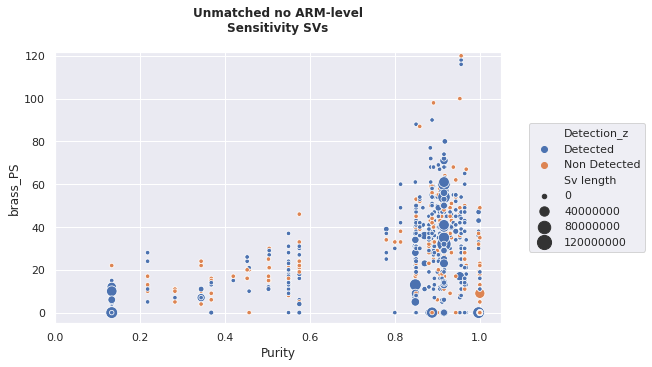

In [855]:
sns.set(rc={'figure.figsize':(8,5)})
heat_triple_svs_nodups_PURITY_groups['Sv length']=heat_triple_svs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity", y="brass_PS", hue="Detection_z",size='Sv length',sizes=(20, 200),alpha=1, data=heat_triple_svs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 122))
plt.title('Unmatched no ARM-level\nSensitivity SVs',weight='bold')
plt.show()    

In [856]:
heat_triple_svs_nodups_PURITY_groups.head(1)

,Unnamed: 0,Unnamed: 0.1,index,Detection_SVs,ID,chr_seg,end_seg,start_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV,Detection_z,Purity,range_purity,range_brass,Size_z,Sv length
0,0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8,Non Detected,Detected,0.3444,"(0.3, 0.4]","(0, 12]",11606.0,11606


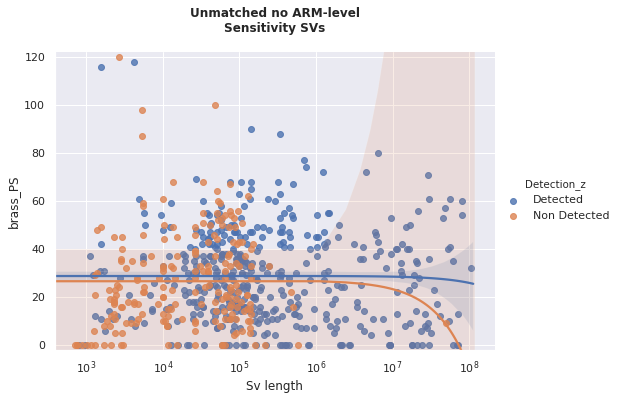

In [865]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Sv length", y="brass_PS", hue="Detection_z",hue_order=['Detected','Non Detected'],data=heat_triple_svs_nodups_PURITY_groups,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(-2, 122))
plt.xscale('log')
plt.title('Unmatched no ARM-level\nSensitivity SVs',weight='bold')
plt.show()

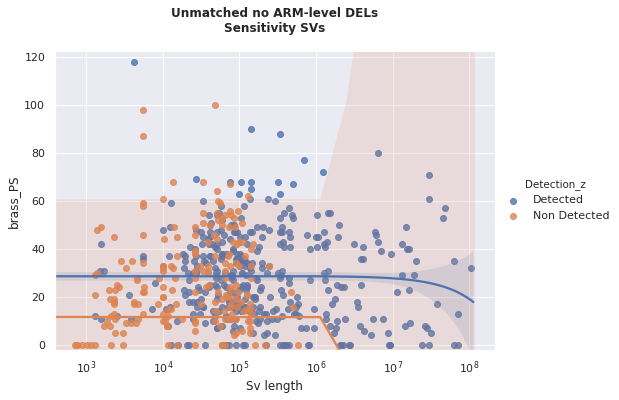

In [867]:
loss=heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['CNV_SV']=='DEL']
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Sv length", y="brass_PS", hue="Detection_z",hue_order=['Detected','Non Detected'],data=loss,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(-2, 122))
plt.xscale('log')
plt.title('Unmatched no ARM-level DELs\nSensitivity SVs',weight='bold')
plt.show() 

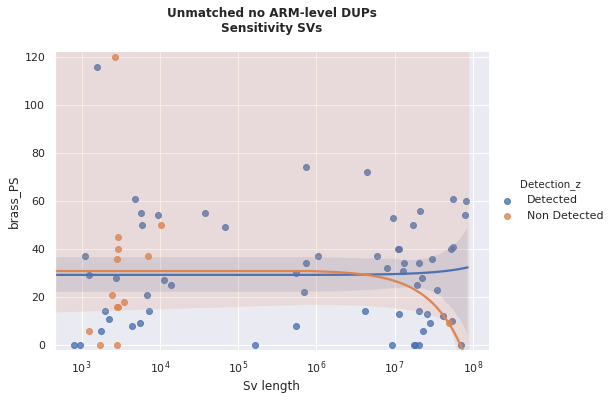

In [868]:
dup=heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['CNV_SV']=='DUP']
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Sv length", y="brass_PS", hue="Detection_z",hue_order=['Detected','Non Detected'],data=dup,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(-2, 122))
plt.xscale('log')
plt.title('Unmatched no ARM-level DUPs\nSensitivity SVs',weight='bold')
plt.show() 

In [639]:
heat_triple_svs_nodups_PURITY_groups.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'Detection_SVs', 'ID', 'chr_seg',
       'end_seg', 'start_seg', 'CNV_SV', 'Sample', 'brass_PS', 'brass_RC',
       'gridss_VF', 'keys', 'svaba_AD', 'Detection_CNV', 'Detection_z',
       'Purity', 'range_purity', 'range_brass', 'Size_z', 'Sv length'],
      dtype='object')

In [642]:
slide=heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'][['chr_seg', 'start_seg', 'end_seg','CNV_SV', 'brass_PS', 'Sample','Detection_z', 'Size_z', 'Purity']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','Detection', 'Size', 'Purity']
#slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index().head()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,Size,Purity
0,202,14,107083253,107169947,DEL,49,IID_H158604_T01_01_WG01,Non Detected,86694,0.91
1,203,14,107136642,107169906,DEL,51,IID_H158604_T01_01_WG01,Non Detected,33264,0.91
2,204,14,107169934,107172881,DUP,45,IID_H158604_T01_01_WG01,Non Detected,2947,0.91
3,188,22,22517074,22522497,DEL,34,IID_H158605_T01_01_WG01,Non Detected,5423,0.78
4,193,14,22892029,22951998,DEL,53,IID_H158606_T01_01_WG01,Non Detected,59969,0.85


In [643]:
print(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Detected'].shape)
print(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'].shape)

(440, 22)
(208, 22)


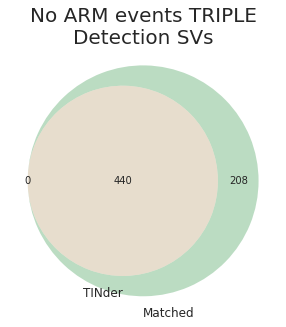

In [645]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,208,440), set_labels = ('TINder', 'Matched'))
plt.title('No ARM events TRIPLE\nDetection SVs',fontsize=20,pad=1)
plt.show()

- SIZES:

In [646]:
sizes_TRIPLE_detected=pd.DataFrame(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Detected'],columns=['Size_z'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'],columns=['Size_z'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [647]:
average_size=sum(sizes_TRIPLE_detected['Size_z'])/len(sizes_TRIPLE_detected['Size_z'])
print('sizes_TRIPLE_detected\t',average_size)

average_size=sum(sizes_TRIPLE_nondetected['Size_z'])/len(sizes_TRIPLE_nondetected['Size_z'])
print('sizes_TRIPLE_nondetected\t',average_size)

sizes_TRIPLE_detected	 4605010.859090909
sizes_TRIPLE_nondetected	 286781.29326923075


In [648]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

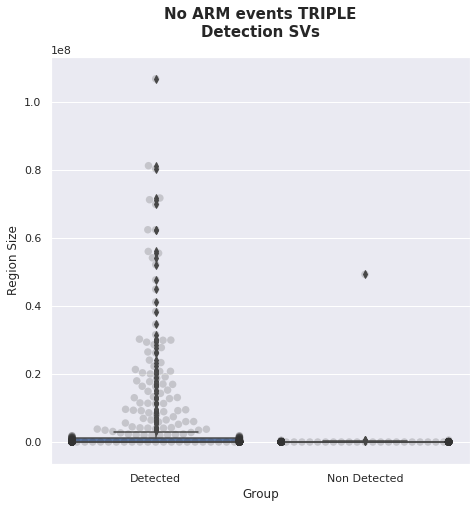

In [649]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TRIPLE\nDetection SVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

In [651]:
sizes_TRIPLE_detected=pd.DataFrame(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Detected'],columns=['Size_z','CNV_SV'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_triple_svs_nodups_PURITY_groups[heat_triple_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'],columns=['Size_z','CNV_SV'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [652]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

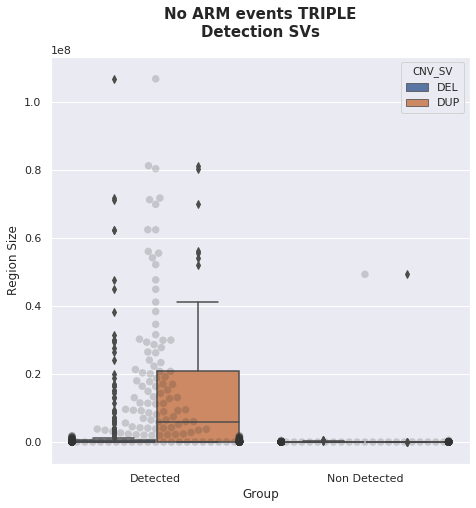

In [654]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size',hue='CNV_SV', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TRIPLE\nDetection SVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

## 2) TINder:

In [869]:
heat_tinder=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_tinder_detect_SVs_FOCAL_DETECT.tsv',sep='\t')
heat_tinder.head()

,Unnamed: 0,Unnamed: 0.1,index,Detection_SVs,GD_AF,GD_POPMAX_AF,chr_seg,SV length,start_seg,end_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV,Detection_z
0,0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0,Non Detected,Detected
1,1,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_49429620_IID_H158604_T01_01_WG01,33.0,Detected,Detected
2,2,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_106373075_IID_H158604_T01_01_WG01,32.0,Detected,Detected
3,3,3,43,Detected,0.005079,0.005808,14.0,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,18.0,33.0,14_22892030_23002450_IID_H158605_T01_01_WG01,25.0,Non Detected,Detected
4,4,4,48,Non Detected,0.000047,0.000132,17.0,1409.0,984908.0,986317.0,DEL,IID_H158605_T01_01_WG01,36.0,12.0,51.0,17_984908_986317_IID_H158605_T01_01_WG01,37.0,Non Detected,Non Detected


In [870]:
print(heat_tinder.shape)
heat_tinder_svs=heat_tinder[~(heat_tinder['brass_PS'].isnull())]

(754, 19)


In [871]:
heat_tinder_svs_nodups=heat_tinder_svs.drop_duplicates(subset='keys')
heat_tinder_svs_nodups.shape

(754, 19)

- Purity:

In [872]:
tinder_purity=pd.read_csv('/work/isabl/home/gutierj2/uk_all/purity/tinder_purity.tsv',sep='\t')
tinder_purity.columns=['Sample','Purity']
tinder_purity.head(1)

,Sample,Purity
0,IID_H158604_T01_01_WG01,1.0


In [873]:
heat_tinder_svs_nodups_PURITY=pd.merge(heat_tinder_svs_nodups,table_purity,on='Sample')
print(heat_tinder_svs_nodups_PURITY.shape)
heat_tinder_svs_nodups_PURITY.head()

(754, 20)


,Unnamed: 0,Unnamed: 0.1,index,Detection_SVs,GD_AF,GD_POPMAX_AF,chr_seg,SV length,start_seg,end_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV,Detection_z,Purity
0,0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0,Non Detected,Detected,0.91
1,1,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_49429620_IID_H158604_T01_01_WG01,33.0,Detected,Detected,0.91
2,2,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_106373075_IID_H158604_T01_01_WG01,32.0,Detected,Detected,0.91
3,565,0,2,Non Detected,-1.000000,-1.000000,10.0,1990.0,120303654.0,120305644.0,DUP,IID_H158604_T01_01_WG01,30.0,0.0,62.0,10_120303654_120305644_IID_H158604_T01_01_WG01,36.0,Non Detected,Non Detected,0.91
4,566,1,30,Non Detected,0.000098,0.000449,8,1813.0,83891490.0,83893303.0,DUP,IID_H158604_T01_01_WG01,26.0,18.0,52.0,8_83891490_83893303_IID_H158604_T01_01_WG01,0.0,Non Detected,Non Detected,0.91


In [874]:
##COLS:

#heat_triple_svs_nodups_PURITY['Purity_y']
#heat_triple_svs_nodups_PURITY['brass_PS']
#heat_triple_svs_nodups_PURITY['Detection_z']

In [875]:
max(heat_tinder_svs_nodups_PURITY['brass_PS'])

118.0

- INTERVALS:

In [876]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [0,12,24,36,48,60,72,84,96,108,120]
heat_tinder_svs_nodups_PURITY_groups=heat_tinder_svs_nodups_PURITY.copy()

heat_tinder_svs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_tinder_svs_nodups_PURITY_groups['Purity'], ranges)
heat_tinder_svs_nodups_PURITY_groups["range_brass"] = pd.cut(heat_tinder_svs_nodups_PURITY_groups['brass_PS'], ranges12)

In [877]:
heat_tinder_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

range_purity  range_brass  Detection_z 
(0.0, 0.1]    (0, 12]      Detected         0
                           Non Detected     0
              (12, 24]     Detected         0
                           Non Detected     0
              (24, 36]     Detected         0
                           Non Detected     0
              (36, 48]     Detected         0
                           Non Detected     0
              (48, 60]     Detected         0
                           Non Detected     0
              (60, 72]     Detected         0
                           Non Detected     0
              (72, 84]     Detected         0
                           Non Detected     0
              (84, 96]     Detected         0
                           Non Detected     0
              (96, 108]    Detected         0
                           Non Detected     0
              (108, 120]   Detected         0
                           Non Detected     0
(0.1, 0.2]    (0, 12]      Detected     

In [878]:
matrix_tinder=heat_tinder_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection_z"]).size()

precisions=[]
for n in range(0,199,2):
    total=matrix_tinder[[n]][0]+matrix_tinder[[n+1]][0]
    precision=matrix_tinder[[n]][0]/total
    precisions.append(precision)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [879]:
len(precisions)

100

In [880]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [12,24,36,48,60,72,84,96,108,120]
df = pd.DataFrame(np.array(precisions).reshape(10,10),index=ranges2, columns=ranges12)

In [881]:
np.array(precisions).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.94444444, 0.5       , 0.        , 0.        , 0.        ,
               nan,        nan,        nan,        nan,        nan],
       [0.66666667, 0.5       , 0.14285714, 0.33333333,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.75      , 1.        , 0.        , 0.        ,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.33333333, 0.4       , 0.2       , 0.        , 0.        ,
        0.5       ,        nan, 0.        ,        nan,        nan],
       [1.        , 0.93181818, 0.66666667, 0.125     , 0.28571429,
        0.        ,        nan,        nan,        nan,        nan],
       [       nan, 0.        , 0.        , 0.66666667, 0.        ,
               nan,        nan,        nan,        nan,        nan],
       [1.        , 0.        , 0.5714285

In [882]:
df

,12,24,36,48,60,72,84,96,108,120
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.944444,0.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
0.3,0.666667,0.500000,0.142857,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.750000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.5,0.333333,0.400000,0.200000,0.000000,0.000000,0.500000,NaN,0.0,NaN,NaN
0.6,1.000000,0.931818,0.666667,0.125000,0.285714,0.000000,NaN,NaN,NaN,NaN
0.7,NaN,0.000000,0.000000,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN
0.8,1.000000,0.000000,0.571429,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN
0.9,0.629630,0.714286,0.666667,0.630435,0.500000,0.375000,0.333333,1.0,NaN,NaN
1.0,0.682927,0.723404,0.677419,0.578947,0.410714,0.484848,0.666667,NaN,NaN,1.0


In [883]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,12,24,36,48,60,72,84,96,108,120
1.0,0.682927,0.723404,0.677419,0.578947,0.410714,0.484848,0.666667,NaN,NaN,1.0
0.9,0.629630,0.714286,0.666667,0.630435,0.500000,0.375000,0.333333,1.0,NaN,NaN
0.8,1.000000,0.000000,0.571429,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN
0.7,NaN,0.000000,0.000000,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN
0.6,1.000000,0.931818,0.666667,0.125000,0.285714,0.000000,NaN,NaN,NaN,NaN
0.5,0.333333,0.400000,0.200000,0.000000,0.000000,0.500000,NaN,0.0,NaN,NaN
0.4,0.750000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.666667,0.500000,0.142857,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.944444,0.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [884]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
12,0.682927,0.629630,1.000000,NaN,1.000000,0.333333,0.75,0.666667,0.944444,NaN
24,0.723404,0.714286,0.000000,0.000000,0.931818,0.400000,1.00,0.500000,0.500000,NaN
36,0.677419,0.666667,0.571429,0.000000,0.666667,0.200000,0.00,0.142857,0.000000,NaN
48,0.578947,0.630435,0.333333,0.666667,0.125000,0.000000,0.00,0.333333,0.000000,NaN
60,0.410714,0.500000,0.000000,0.000000,0.285714,0.000000,NaN,NaN,0.000000,NaN
72,0.484848,0.375000,NaN,NaN,0.000000,0.500000,NaN,NaN,NaN,NaN
84,0.666667,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [885]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.666667
72,NaN,NaN,NaN,NaN,0.500000,0.000000,NaN,NaN,0.375000,0.484848
60,NaN,0.000000,NaN,NaN,0.000000,0.285714,0.000000,0.000000,0.500000,0.410714
48,NaN,0.000000,0.333333,0.00,0.000000,0.125000,0.666667,0.333333,0.630435,0.578947
36,NaN,0.000000,0.142857,0.00,0.200000,0.666667,0.000000,0.571429,0.666667,0.677419
24,NaN,0.500000,0.500000,1.00,0.400000,0.931818,0.000000,0.000000,0.714286,0.723404
12,NaN,0.944444,0.666667,0.75,0.333333,1.000000,NaN,1.000000,0.629630,0.682927


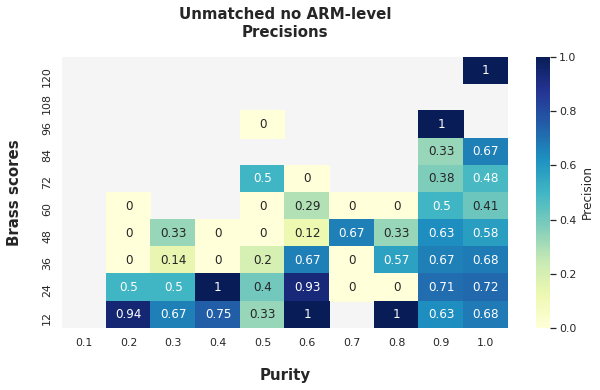

In [886]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
plt.title('Unmatched no ARM-level\nPrecisions',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

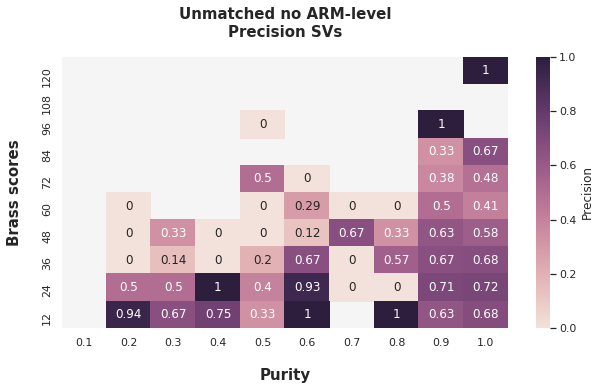

In [887]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched no ARM-level\nPrecision SVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

In [888]:
heat_tinder_svs_nodups_PURITY_groups['Size_z']=heat_tinder_svs_nodups_PURITY_groups['end_seg']-heat_tinder_svs_nodups_PURITY_groups['start_seg']

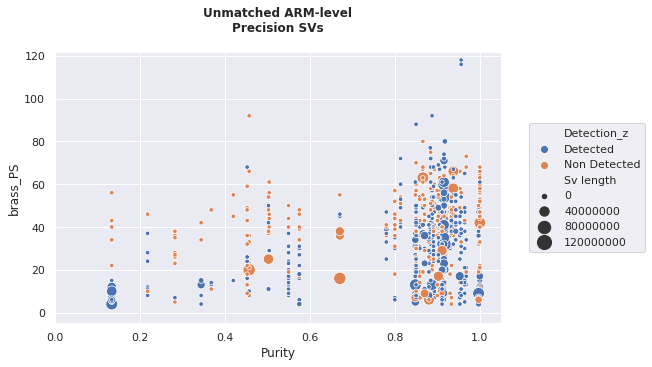

In [889]:
sns.set(rc={'figure.figsize':(8,5)})
heat_tinder_svs_nodups_PURITY_groups['Sv length']=heat_tinder_svs_nodups_PURITY_groups['Size_z'].map(int)
ax = sns.scatterplot(x="Purity", y="brass_PS", hue="Detection_z",size='Sv length',sizes=(20, 200),alpha=1, data=heat_tinder_svs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 122))
plt.title('Unmatched ARM-level\nPrecision SVs',weight='bold')
plt.show()    

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


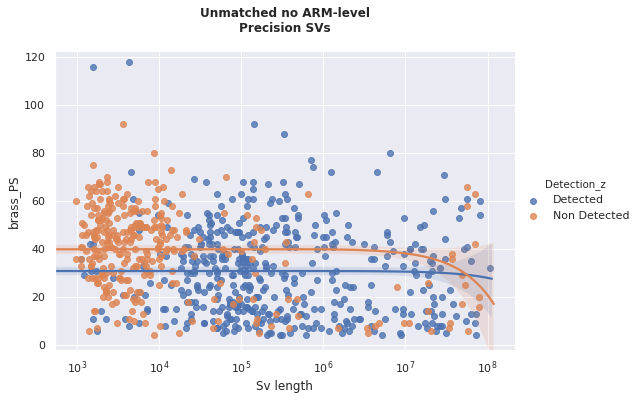

In [890]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Sv length", y="brass_PS", hue="Detection_z",hue_order=['Detected','Non Detected'],data=heat_tinder_svs_nodups_PURITY_groups,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(-2, 122))
plt.xscale('log')
plt.title('Unmatched no ARM-level\nPrecision SVs',weight='bold')
plt.show()

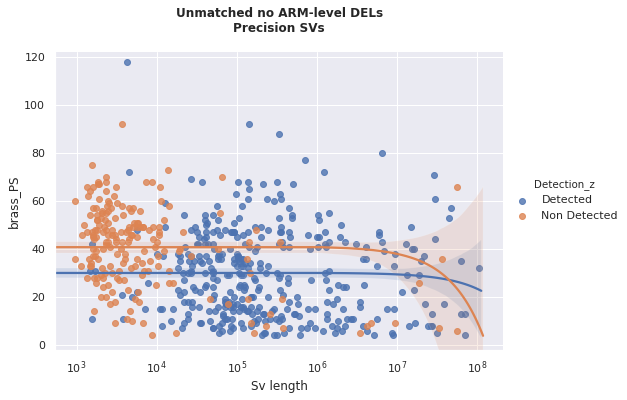

In [891]:
loss=heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['CNV_SV']=='DEL']
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Sv length", y="brass_PS", hue="Detection_z",hue_order=['Detected','Non Detected'],data=loss,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(-2, 122))
plt.xscale('log')
plt.title('Unmatched no ARM-level DELs\nPrecision SVs',weight='bold')
plt.show() 

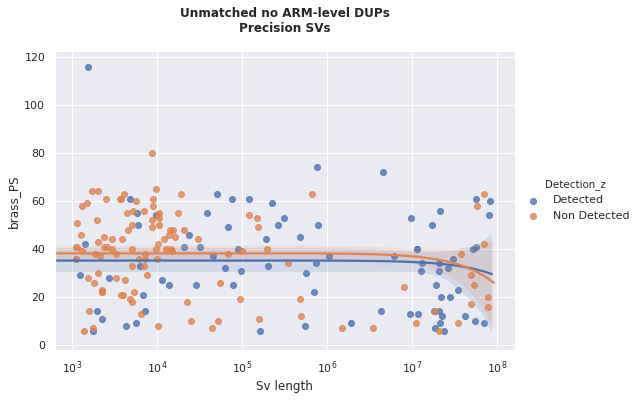

In [892]:
dup=heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['CNV_SV']=='DUP']
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Sv length", y="brass_PS", hue="Detection_z",hue_order=['Detected','Non Detected'],data=dup,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
#ax.set(xlim=(0, 1000000000))
ax.set(ylim=(-2, 122))
plt.xscale('log')
plt.title('Unmatched no ARM-level DUPs\nPrecision SVs',weight='bold')
plt.show() 

In [684]:
heat_tinder_svs_nodups_PURITY_groups.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'Detection_SVs', 'GD_AF',
       'GD_POPMAX_AF', 'chr_seg', 'SV length', 'start_seg', 'end_seg',
       'CNV_SV', 'Sample', 'brass_PS', 'brass_RC', 'gridss_VF', 'keys',
       'svaba_AD', 'Detection_CNV', 'Detection_z', 'Purity', 'range_purity',
       'range_brass', 'Size_z', 'Sv length'],
      dtype='object')

In [685]:
slide=heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'][['chr_seg', 'start_seg', 'end_seg','CNV_SV', 'brass_PS', 'Sample','Detection_z', 'Size_z', 'Purity']]
slide.columns=['chr_seg', 'start_seg', 'end_seg','CNV', 'Cells', 'Sample','Detection', 'Size', 'Purity']
#slide['chr_seg']=slide['chr_seg'].map(int)
slide['start_seg']=slide['start_seg'].map(int)
slide['end_seg']=slide['end_seg'].map(int)
slide['Size']=slide['Size'].map(int)
slide.sort_values(by=['Sample']).reset_index().head()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,Size,Purity
0,3,10.0,120303654,120305644,DUP,30.0,IID_H158604_T01_01_WG01,Non Detected,1990,0.91
1,4,8,83891490,83893303,DUP,26.0,IID_H158604_T01_01_WG01,Non Detected,1813,0.91
2,6,17.0,984908,986317,DEL,36.0,IID_H158605_T01_01_WG01,Non Detected,1409,0.78
3,11,13,58011247,58016252,DUP,40.0,IID_H158605_T01_01_WG01,Non Detected,5005,0.78
4,12,8,101179292,101181852,DUP,41.0,IID_H158605_T01_01_WG01,Non Detected,2560,0.78


In [686]:
print(heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Detected'].shape)
print(heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'].shape)

(446, 24)
(308, 24)


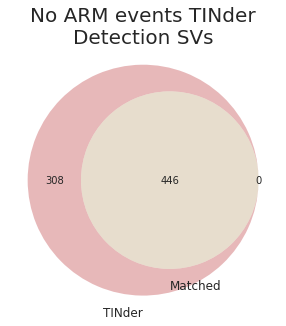

In [687]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (308,0,446), set_labels = ('TINder', 'Matched'))
plt.title('No ARM events TINder\nDetection SVs',fontsize=20,pad=1)
plt.show()

- SIZES:

In [676]:
sizes_TRIPLE_detected=pd.DataFrame(heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Detected'],columns=['Size_z'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'],columns=['Size_z'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [677]:
average_size=sum(sizes_TRIPLE_detected['Size_z'])/len(sizes_TRIPLE_detected['Size_z'])
print('sizes_TRIPLE_detected\t',average_size)

average_size=sum(sizes_TRIPLE_nondetected['Size_z'])/len(sizes_TRIPLE_nondetected['Size_z'])
print('sizes_TRIPLE_nondetected\t',average_size)

sizes_TRIPLE_detected	 4812290.8071748875
sizes_TRIPLE_nondetected	 2829864.5324675324


In [678]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

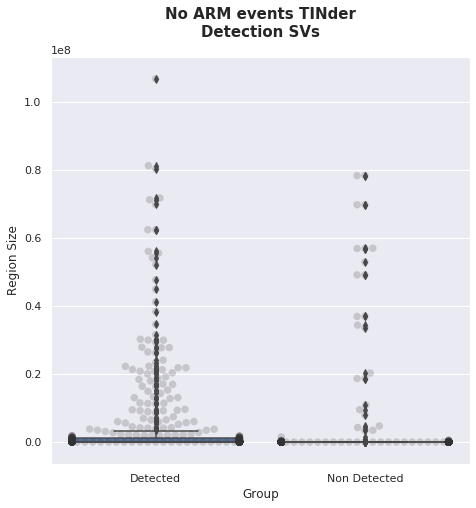

In [680]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TINder\nDetection SVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

In [681]:
sizes_TRIPLE_detected=pd.DataFrame(heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Detected'],columns=['Size_z','CNV_SV'])
sizes_TRIPLE_detected['Group']='Detected'

sizes_TRIPLE_nondetected=pd.DataFrame(heat_tinder_svs_nodups_PURITY_groups[heat_tinder_svs_nodups_PURITY_groups['Detection_z']=='Non Detected'],columns=['Size_z','CNV_SV'])
sizes_TRIPLE_nondetected['Group']='Non Detected'

In [682]:
sizes_TOTAL_df=sizes_TRIPLE_detected.copy()
sizes_TOTAL_df=sizes_TRIPLE_detected.append(sizes_TRIPLE_nondetected,ignore_index=True)
#sizes_TOTAL_df

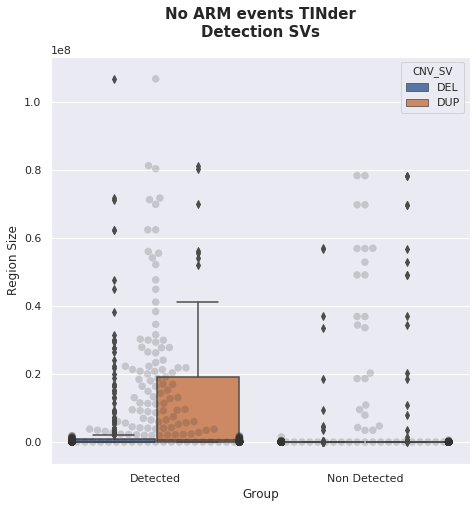

In [683]:
sizes_TOTAL_df['Size']=sizes_TOTAL_df['Size_z'].map(int)
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='Size',hue='CNV_SV', data=sizes_TOTAL_df,order=['Detected','Non Detected'])
ax = sns.swarmplot(x='Group',y='Size',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['Detected','Non Detected'])
ax.set_title('No ARM events TINder\nDetection SVs',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

## TRAs

In [ ]:
tinder_detect_TRAs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_TRA_only_order_DETECT.tsv',sep='\t')
triple_detect_TRAs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_TRA_key_DETECT.tsv',sep='\t')

## 1) TRIPLE:

In [735]:
heat_triple=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_TRA_key_DETECT.tsv',sep='\t')
heat_triple.head()

,Unnamed: 0,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection
0,0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01,Detected
1,1,20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,24,44,0,11,116966714,4_31299869_11_116966714_IID_H158636_T01_01_WG01,Detected
2,2,0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,0,22,13,5,174621621,1_3689668_5_174621621_IID_H158613_T01_01_WG01,Detected
3,3,3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,4,14,8,14,22984604,12_46124335_14_22984604_IID_H158641_T01_01_WG01,Detected
4,4,2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,0,14,13,22,41530230,12_6793843_22_41530230_IID_H158669_T01_01_WG01,Detected


In [736]:
print(heat_triple.shape)

(212, 16)


In [737]:
heat_triple_svs_nodups=heat_triple.drop_duplicates(subset='keys')
heat_triple_svs_nodups.shape

(212, 16)

In [738]:
heat_triple_svs_nodups_no66=heat_triple_svs_nodups[~(heat_triple_svs_nodups['Sample']=='IID_H158666_T01_01_WG01')]
heat_triple_svs_nodups_no66.shape

(208, 16)

- Purity:

In [739]:
BTG_directories_doc='/home/gutierj2/uk_all/321project_BATTENBERG_directories.list'
BTG_directories=!cat {BTG_directories_doc}

sample_list=[]
purity_list=[]

for n in BTG_directories:
    route=n+'/*_rho_and_psi.txt'
    path=!ls {route}
    
    sample=path[0].split('/')[8].split('_rho')[0]
    
    purity_file=pd.read_csv(path[0],sep='\t')
    for index,row in purity_file.iterrows():
        if(index=='FRAC_GENOME'):
            sample_list.append(sample)
            purity_list.append(row['rho'])
 
table_purity=pd.DataFrame()
table_purity['Sample']=sample_list
table_purity['Sample_y']=sample_list
table_purity['Purity']=purity_list
table_purity=table_purity[['Sample','Purity']]

In [740]:
table_purity.sort_values(by=['Sample'])

,Sample,Purity
0,IID_H158604_T01_01_WG01,0.910000
3,IID_H158605_T01_01_WG01,0.780000
2,IID_H158606_T01_01_WG01,0.850000
1,IID_H158607_T01_01_WG01,0.800000
4,IID_H158608_T01_01_WG01,0.921840
5,IID_H158609_T01_01_WG01,0.504500
7,IID_H158610_T01_01_WG01,0.893000
8,IID_H158611_T01_01_WG01,0.953000
14,IID_H158612_T01_01_WG01,0.344400
15,IID_H158613_T01_01_WG01,0.848320


In [741]:
heat_triple_svs_nodups_PURITY=pd.merge(heat_triple_svs_nodups_no66,table_purity,on='Sample')
print(heat_triple_svs_nodups_PURITY.shape)
heat_triple_svs_nodups_PURITY.head()

(208, 17)


,Unnamed: 0,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection,Purity
0,0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01,Detected,0.9063
1,16,183,6,89569761,89569762,6_89569761_8_128756939_TRA_+-,TRA,IID_H158617_T01_01_WG01,68,38,94,66,8,128756939,6_89569761_8_128756939_IID_H158617_T01_01_WG01,Detected,0.9063
2,49,41,13,28832635,28832636,13_28832635_14_50591432_TRA_--,TRA,IID_H158617_T01_01_WG01,42,25,58,58,14,50591432,13_28832635_14_50591432_IID_H158617_T01_01_WG01,Detected,0.9063
3,51,171,5,49766453,49766454,5_49766453_8_39908655_TRA_+-,TRA,IID_H158617_T01_01_WG01,42,15,53,23,8,39908655,5_49766453_8_39908655_IID_H158617_T01_01_WG01,Detected,0.9063
4,76,148,15,97615396,97615397,15_97615396_16_64358166_TRA_-+,TRA,IID_H158617_T01_01_WG01,36,16,53,25,16,64358166,15_97615396_16_64358166_IID_H158617_T01_01_WG01,Detected,0.9063


In [742]:
##COLS:

#heat_triple_svs_nodups_PURITY['Purity_y']
#heat_triple_svs_nodups_PURITY['brass_PS']
#heat_triple_svs_nodups_PURITY['Detection_z']

In [743]:
max(heat_triple_svs_nodups_PURITY['brass_PS'])

93

- INTERVALS:

In [744]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [0,10,20,30,40,50,60,70,80,90,100]
heat_triple_svs_nodups_PURITY_groups=heat_triple_svs_nodups_PURITY.copy()

heat_triple_svs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_triple_svs_nodups_PURITY_groups['Purity'], ranges)
heat_triple_svs_nodups_PURITY_groups["range_brass"] = pd.cut(heat_triple_svs_nodups_PURITY_groups['brass_PS'], ranges12)

In [745]:
heat_triple_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection"]).size()

range_purity  range_brass  Detection   
(0.0, 0.1]    (0, 10]      Detected         0
                           Non Detected     0
              (10, 20]     Detected         0
                           Non Detected     0
              (20, 30]     Detected         0
                           Non Detected     0
              (30, 40]     Detected         0
                           Non Detected     0
              (40, 50]     Detected         0
                           Non Detected     0
              (50, 60]     Detected         0
                           Non Detected     0
              (60, 70]     Detected         0
                           Non Detected     0
              (70, 80]     Detected         0
                           Non Detected     0
              (80, 90]     Detected         0
                           Non Detected     0
              (90, 100]    Detected         0
                           Non Detected     0
(0.1, 0.2]    (0, 10]      Detected     

In [746]:
matrix_triple=heat_triple_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection"]).size()

sensitivities=[]
for n in range(0,200,2):
    total=matrix_triple[[n]][0]+matrix_triple[[n+1]][0]
    sensitivity=matrix_triple[[n]][0]/total
    sensitivities.append(sensitivity)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [747]:
len(sensitivities)

100

In [748]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [10,20,30,40,50,60,70,80,90,100]
df = pd.DataFrame(np.array(sensitivities).reshape(10,10),index=ranges2, columns=ranges12)

In [749]:
np.array(sensitivities).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.875     , 1.        ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.        , 1.        ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.        , 1.        ,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [1.        , 1.        , 1.        ,        nan,        nan,
        1.        ,        nan,        nan,        nan,        nan],
       [1.        , 0.75      , 1.        , 1.        ,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        na

In [750]:
df

,10,20,30,40,50,60,70,80,90,100
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.875,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,1.000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,1.000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,1.000,1.000000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0.6,1.000,0.750000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9,0.400,0.818182,0.954545,0.964286,1.0,1.0,1.0,1.0,NaN,NaN
1.0,0.500,0.666667,1.000000,0.911765,1.0,1.0,1.0,NaN,NaN,1.0


In [751]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,10,20,30,40,50,60,70,80,90,100
1.0,0.500,0.666667,1.000000,0.911765,1.0,1.0,1.0,NaN,NaN,1.0
0.9,0.400,0.818182,0.954545,0.964286,1.0,1.0,1.0,1.0,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,1.000,0.750000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.5,1.000,1.000000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0.4,1.000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,1.000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.875,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [752]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
10,0.500000,0.400000,NaN,NaN,1.00,1.0,1.0,1.0,0.875,NaN
20,0.666667,0.818182,NaN,NaN,0.75,1.0,1.0,1.0,1.000,NaN
30,1.000000,0.954545,NaN,NaN,1.00,1.0,NaN,NaN,NaN,NaN
40,0.911765,0.964286,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
50,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1.000000,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
70,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [753]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
60,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.000000,1.000000
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
40,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.964286,0.911765
30,NaN,NaN,NaN,NaN,1.0,1.00,NaN,NaN,0.954545,1.000000
20,NaN,1.000,1.0,1.0,1.0,0.75,NaN,NaN,0.818182,0.666667
10,NaN,0.875,1.0,1.0,1.0,1.00,NaN,NaN,0.400000,0.500000


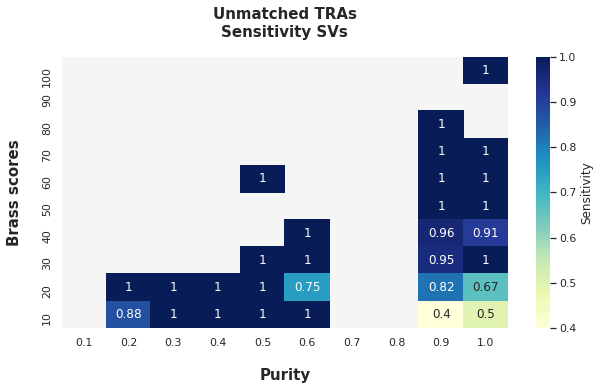

In [754]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
plt.title('Unmatched TRAs\nSensitivity SVs',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

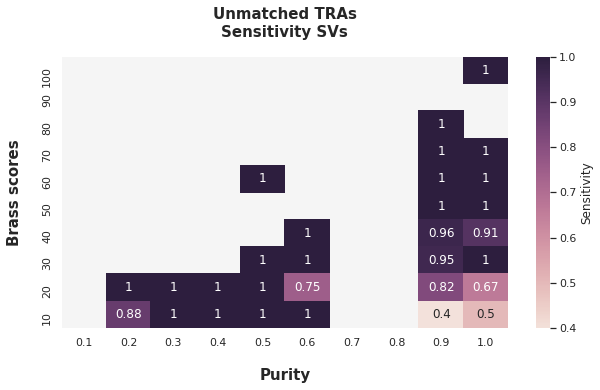

In [755]:
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Sensitivity'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched TRAs\nSensitivity SVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

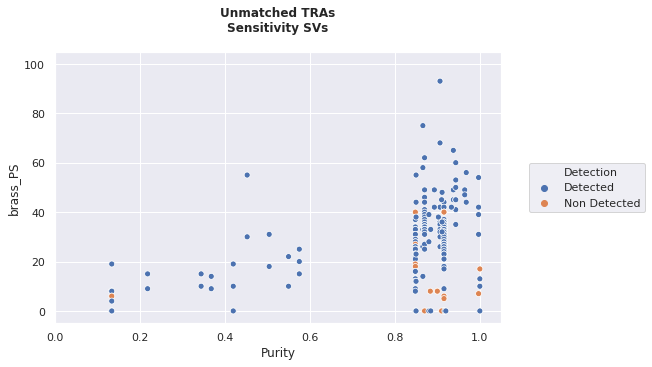

In [756]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.scatterplot(x="Purity", y="brass_PS", hue="Detection",alpha=1, data=heat_triple_svs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 105))
plt.title('Unmatched TRAs\nSensitivity SVs',weight='bold')
plt.show()    

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


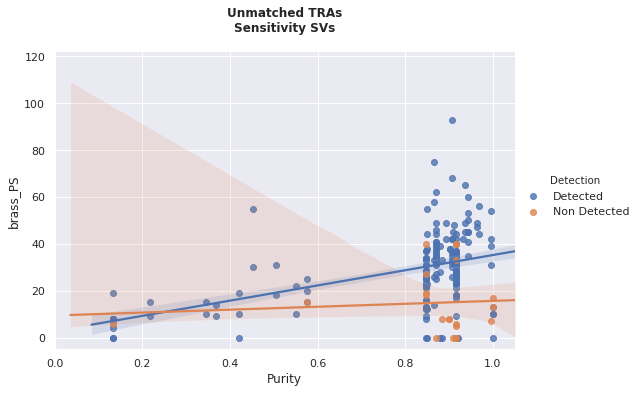

In [757]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Purity", y="brass_PS", hue="Detection", data=heat_triple_svs_nodups_PURITY_groups,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 122))
plt.title('Unmatched TRAs\nSensitivity SVs',weight='bold')
plt.show() 

## 2) TINder:

In [690]:
heat_tinder=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_TRA_only_order_DETECT.tsv',sep='\t')
heat_tinder.head()

,Unnamed: 0,index,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection
0,0,0,12.0,6791754,22.0,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,0,60,43,Detected
1,1,1,3.0,57440299,6.0,56757781,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440299_6_56757781_IID_H158604_T01_01_WG01,33,0,37,32,Non Detected
2,2,2,6.0,29814678,12.0,133066751,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814678_12_133066751_IID_H158604_T01_01_WG01,15,1,21,18,Non Detected
3,3,3,2.0,3931651,12.0,124499974,-1,-1,TRA,IID_H158606_T01_01_WG01,2_3931651_12_124499974_IID_H158606_T01_01_WG01,56,24,72,0,Non Detected
4,4,4,8.0,66514692,11.0,55053049,-1,-1,TRA,IID_H158606_T01_01_WG01,8_66514692_11_55053049_IID_H158606_T01_01_WG01,22,0,0,21,Non Detected


In [691]:
print(heat_tinder.shape)
heat_tinder_svs=heat_tinder[~(heat_tinder['brass_PS'].isnull())]

(368, 16)


In [692]:
heat_tinder_svs_nodups=heat_tinder_svs.drop_duplicates(subset='keys')
heat_tinder_svs_nodups.shape

(368, 16)

- Purity:

In [693]:
tinder_purity=pd.read_csv('/work/isabl/home/gutierj2/uk_all/purity/tinder_purity.tsv',sep='\t')
tinder_purity.columns=['Sample','Purity']
tinder_purity.head(1)

,Sample,Purity
0,IID_H158604_T01_01_WG01,1.0


In [694]:
heat_tinder_svs_nodups_PURITY=pd.merge(heat_tinder_svs_nodups,table_purity,on='Sample')
print(heat_tinder_svs_nodups_PURITY.shape)
heat_tinder_svs_nodups_PURITY.head()

(368, 17)


,Unnamed: 0,index,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection,Purity
0,0,0,12.0,6791754,22.0,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,0,60,43,Detected,0.91
1,1,1,3.0,57440299,6.0,56757781,-1,-1,TRA,IID_H158604_T01_01_WG01,3_57440299_6_56757781_IID_H158604_T01_01_WG01,33,0,37,32,Non Detected,0.91
2,2,2,6.0,29814678,12.0,133066751,-1,-1,TRA,IID_H158604_T01_01_WG01,6_29814678_12_133066751_IID_H158604_T01_01_WG01,15,1,21,18,Non Detected,0.91
3,334,334,7.0,30484963,X,133854098,-1,-1,TRA,IID_H158604_T01_01_WG01,7_30484963_X_133854098_IID_H158604_T01_01_WG01,6,0,0,11,Non Detected,0.91
4,3,3,2.0,3931651,12.0,124499974,-1,-1,TRA,IID_H158606_T01_01_WG01,2_3931651_12_124499974_IID_H158606_T01_01_WG01,56,24,72,0,Non Detected,0.85


In [695]:
##COLS:

#heat_triple_svs_nodups_PURITY['Purity_y']
#heat_triple_svs_nodups_PURITY['brass_PS']
#heat_triple_svs_nodups_PURITY['Detection_z']

In [696]:
max(heat_tinder_svs_nodups_PURITY['brass_PS'])

93

- INTERVALS:

In [697]:
ranges = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [0,10,20,30,40,50,60,70,80,90,100]
heat_tinder_svs_nodups_PURITY_groups=heat_tinder_svs_nodups_PURITY.copy()

heat_tinder_svs_nodups_PURITY_groups["range_purity"] = pd.cut(heat_tinder_svs_nodups_PURITY_groups['Purity'], ranges)
heat_tinder_svs_nodups_PURITY_groups["range_brass"] = pd.cut(heat_tinder_svs_nodups_PURITY_groups['brass_PS'], ranges12)

In [698]:
heat_tinder_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection"]).size()

range_purity  range_brass  Detection   
(0.0, 0.1]    (0, 10]      Detected         0
                           Non Detected     0
              (10, 20]     Detected         0
                           Non Detected     0
              (20, 30]     Detected         0
                           Non Detected     0
              (30, 40]     Detected         0
                           Non Detected     0
              (40, 50]     Detected         0
                           Non Detected     0
              (50, 60]     Detected         0
                           Non Detected     0
              (60, 70]     Detected         0
                           Non Detected     0
              (70, 80]     Detected         0
                           Non Detected     0
              (80, 90]     Detected         0
                           Non Detected     0
              (90, 100]    Detected         0
                           Non Detected     0
(0.1, 0.2]    (0, 10]      Detected     

In [699]:
matrix_tinder=heat_tinder_svs_nodups_PURITY_groups.groupby([ "range_purity",'range_brass',"Detection"]).size()

precisions=[]
for n in range(0,199,2):
    total=matrix_tinder[[n]][0]+matrix_tinder[[n+1]][0]
    precision=matrix_tinder[[n]][0]/total
    precisions.append(precision)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


### - SUBSETs:

In [700]:
len(precisions)

100

In [701]:
#Matrix
ranges2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ranges12 = [10,20,30,40,50,60,70,80,90,100]
df = pd.DataFrame(np.array(precisions).reshape(10,10),index=ranges2, columns=ranges12)

In [702]:
np.array(precisions).reshape(10,10)

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.9       , 1.        ,        nan, 0.        ,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.33333333, 0.5       ,        nan,        nan, 0.        ,
               nan,        nan,        nan,        nan,        nan],
       [0.66666667, 0.5       , 0.        , 0.        ,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.2       , 0.4       , 1.        , 0.        ,        nan,
        0.33333333,        nan,        nan,        nan,        nan],
       [0.33333333, 0.375     , 0.5       , 0.25      , 0.        ,
               nan,        nan,        nan,        nan,        nan],
       [0.        , 0.        ,        nan, 0.        ,        nan,
               nan,        nan,        nan,        nan,        nan],
       [0.        ,        nan,        na

In [703]:
df

,10,20,30,40,50,60,70,80,90,100
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.900000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.333333,0.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0.4,0.666667,0.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.5,0.200000,0.400000,1.000000,0.000000,NaN,0.333333,NaN,NaN,NaN,NaN
0.6,0.333333,0.375000,0.500000,0.250000,0.000000,NaN,NaN,NaN,NaN,NaN
0.7,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.8,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0.9,0.235294,0.416667,0.709677,0.818182,0.727273,0.400000,1.0,1.0,NaN,NaN
1.0,0.107143,0.175000,0.645161,0.794872,0.782609,0.714286,0.4,NaN,NaN,1.0


In [704]:
df_placed=df.reindex(index=df.index[::-1])
df_placed

,10,20,30,40,50,60,70,80,90,100
1.0,0.107143,0.175000,0.645161,0.794872,0.782609,0.714286,0.4,NaN,NaN,1.0
0.9,0.235294,0.416667,0.709677,0.818182,0.727273,0.400000,1.0,1.0,NaN,NaN
0.8,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0.7,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.6,0.333333,0.375000,0.500000,0.250000,0.000000,NaN,NaN,NaN,NaN,NaN
0.5,0.200000,0.400000,1.000000,0.000000,NaN,0.333333,NaN,NaN,NaN,NaN
0.4,0.666667,0.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.333333,0.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
0.2,0.900000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [705]:
df_placed_t=df_placed.transpose()
df_placed_t

,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1
10,0.107143,0.235294,0.0,0.0,0.333333,0.200000,0.666667,0.333333,0.9,NaN
20,0.175000,0.416667,NaN,0.0,0.375000,0.400000,0.500000,0.500000,1.0,NaN
30,0.645161,0.709677,NaN,NaN,0.500000,1.000000,0.000000,NaN,NaN,NaN
40,0.794872,0.818182,NaN,0.0,0.250000,0.000000,0.000000,NaN,0.0,NaN
50,0.782609,0.727273,0.0,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
60,0.714286,0.400000,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN
70,0.400000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [706]:
df_placed_theat=df_placed_t.reindex(index=df_placed_t.index[::-1])
df_placed_theat=df_placed_theat[df_placed_theat.columns[::-1]]
df_placed_theat

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.400000
60,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,0.400000,0.714286
50,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0,0.727273,0.782609
40,NaN,0.0,NaN,0.000000,0.000000,0.250000,0.0,NaN,0.818182,0.794872
30,NaN,NaN,NaN,0.000000,1.000000,0.500000,NaN,NaN,0.709677,0.645161
20,NaN,1.0,0.500000,0.500000,0.400000,0.375000,0.0,NaN,0.416667,0.175000
10,NaN,0.9,0.333333,0.666667,0.200000,0.333333,0.0,0.0,0.235294,0.107143


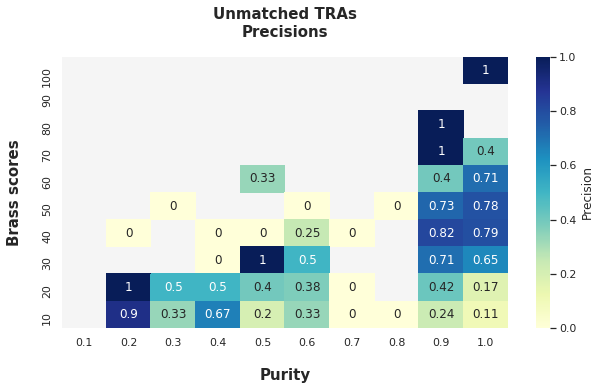

In [707]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap="YlGnBu",cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
plt.title('Unmatched TRAs\nPrecisions',weight='bold',fontsize=15)
g.set_facecolor('whitesmoke')
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

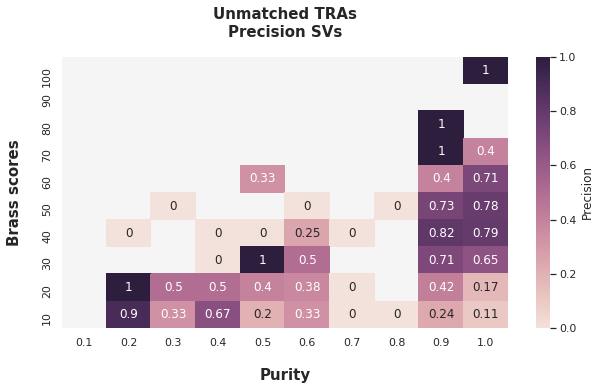

In [708]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams['font.family'] = "Helvetica"
cmap_palette = sns.cubehelix_palette(as_cmap=True, light=.9)
mask = df_placed_theat.isnull()
g=sns.heatmap(df_placed_theat,annot=True,cmap=cmap_palette,cbar_kws={'label': 'Precision'},mask=df_placed_theat.isnull())
g.set_facecolor('whitesmoke')
plt.title('Unmatched TRAs\nPrecision SVs',weight='bold',fontsize=15)
plt.xlabel('Purity',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('Brass scores',weight='bold',fontsize=15,labelpad=20)
plt.show()

- Points:

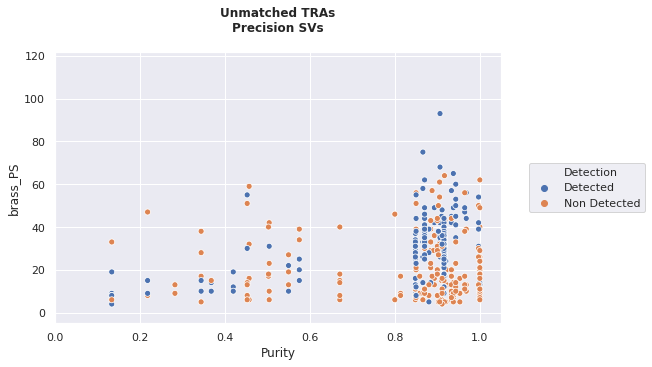

In [709]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.scatterplot(x="Purity", y="brass_PS", hue="Detection",alpha=1, data=heat_tinder_svs_nodups_PURITY_groups)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 122))
plt.title('Unmatched TRAs\nPrecision SVs',weight='bold')
plt.show()    

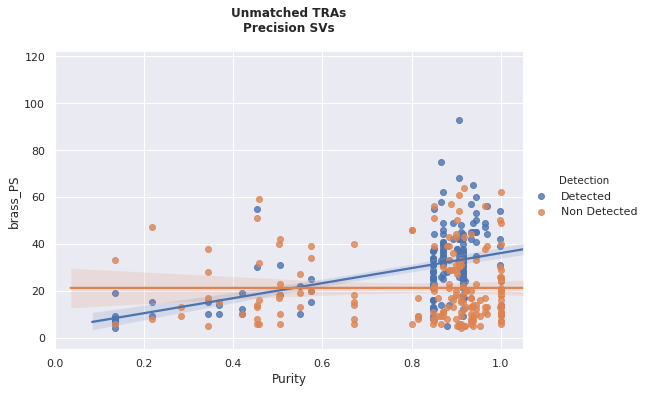

In [734]:
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.lmplot(x="Purity", y="brass_PS", hue="Detection", data=heat_tinder_svs_nodups_PURITY_groups,height=5, aspect=1.5)
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
ax.set(xlim=(0, 1.05))
ax.set(ylim=(-5, 122))
plt.title('Unmatched TRAs\nPrecision SVs',weight='bold')
plt.show() 